In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings

In [2]:
# figureout warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
#Read our CSV file
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Data Inspection on Application dataset
# Get info and shape on the dataset

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Data quality check
# check for percentage null values in dataset

In [7]:
pd.set_option('display.max_columns', 200)
app_data.isnull().mean() * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [8]:
## Conclusion : column with null values more than 47% may give wrong insights, hence will drop them ##
# Dropping columns with missing values greater than 47%
percentage = 47
threshold = int(((100 - percentage)/100)*app_data.shape[0] + 1)
app_df = app_data.dropna(axis=1, how='any')
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
app_df.shape

(307511, 55)

In [10]:
app_df.isnull().mean() * 100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_

In [11]:
# impute missing values
# Check the missing value in application dataset before imputing

In [12]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [13]:
app_df.ORGANIZATION_TYPE.isnull().mean()*100

0.0

In [14]:
app_df.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [15]:
app_df.CNT_CHILDREN.isnull().mean()*100

0.0

In [16]:
app_df.CNT_CHILDREN.value_counts(normalize=True)*100

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

In [17]:
app_df.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

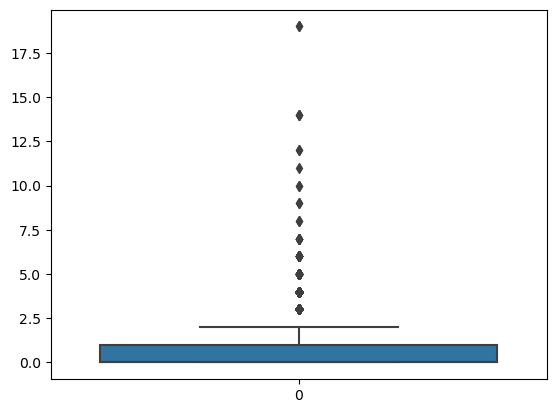

In [18]:
sns.boxplot(app_df. CNT_CHILDREN)
plt.show()

In [19]:
app_df.CNT_CHILDREN.fillna(app_df.CNT_CHILDREN.median(), inplace=True ) 
app_df.CNT_CHILDREN.isnull().mean()*100

0.0

In [20]:
null_cols = list(app_df.isna().any())
len(null_cols)

55

In [21]:
app_df.isnull().mean() * 100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_

In [22]:
# Handling Missing Values in column with 13% null values
app_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [23]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [24]:
## Conclusion : we cool see that 99% of values in the column. ##
# Hence imputing this column with mode

In [25]:
Cols = ["AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_WEEK"] 

In [26]:
for col in Cols :
    app_data[col].fillna(app_data[col].mode()[0], inplace = True)

In [27]:
app_data.isnull().mean() * 100

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 122, dtype: float64

In [28]:
## Conclusion : For categorical columns, impute the missing value with mode ##
# for numrical columns, imputing missing values with median

In [29]:
app_df.DAYS_BIRTH.fillna(app_df.DAYS_BIRTH.mode()[0], inplace = True)

In [30]:
app_df.CNT_CHILDREN.fillna(app_df.CNT_CHILDREN .mode()[0], inplace = True)

In [31]:
# Imputing Numerical columns
app_df.AMT_INCOME_TOTAL.fillna(app_df.AMT_INCOME_TOTAL.median(), inplace=True ) 
app_df.AMT_CREDIT.fillna(app_df.AMT_CREDIT.median(), inplace=True ) 
app_df.HOUR_APPR_PROCESS_START.fillna(app_df.HOUR_APPR_PROCESS_START.median(), inplace=True ) 

In [32]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [33]:
app_df.isnull().mean() * 100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_

In [34]:
# Convert negative values to positive in days variable so that median is not affected
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED = app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH  = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))

In [35]:
# Binning of Continuous variable 
# Standardizing days columns in years for easy binning

In [36]:
app_df["YEARS_BIRTH"]= app_df.DAYS_BIRTH.apply(lambda x: int(x//365))
app_df["YEARS_EMPLOYED"]= app_df.DAYS_EMPLOYED.apply(lambda x: int(x//365))
app_df["YEARS_REGISTRATION"]= app_df.DAYS_REGISTRATION.apply(lambda x: int(x//365))
app_df["YEARS_ID_PUBLISH"]= app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//365))

In [37]:
# Binning of AMT_CREDIT Columnn
app_df.AMT_CREDIT.value_counts(normalize=True)* 100

450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: AMT_CREDIT, Length: 5603, dtype: float64

In [38]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [39]:
app_df["AMT_CREDIT_CATEGORY"] = pd.cut(app_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000],
                                      labels= ["Very low credit", "low credit", "medium credit", "high credit", "very high credit"])

In [40]:
app_df.AMT_CREDIT_CATEGORY.value_counts(normalize=True)* 100

low credit          31.511770
medium credit       25.733324
high credit         16.791314
Very low credit     14.035088
very high credit    11.928504
Name: AMT_CREDIT_CATEGORY, dtype: float64

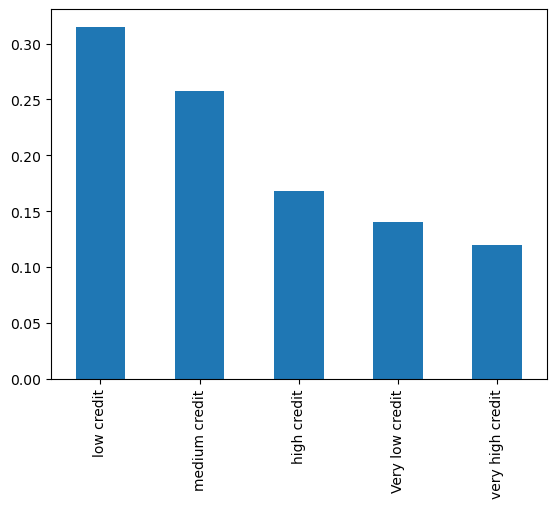

In [41]:
# Data visualization through "BAR GRAPH"
app_df["AMT_CREDIT_CATEGORY"].value_counts(normalize=True).plot.bar()
plt.show() 

In [42]:
## Conclusion : The credit amount of the loan for amount low (2L to 4l) or very high (above 8L) ##

In [43]:
# Binning YEARS_BIRTH column
app_df["AGE_CATEGORY"] = pd.cut(app_df.YEARS_BIRTH, [0, 25, 45, 65, 85], 
                                labels= ["below 25", "25-45", "45-65", "65-85"])

In [44]:
app_df.AGE_CATEGORY.value_counts(normalize=True)* 100

25-45       51.901233
45-65       41.163406
below 25     5.306477
65-85        1.628885
Name: AGE_CATEGORY, dtype: float64

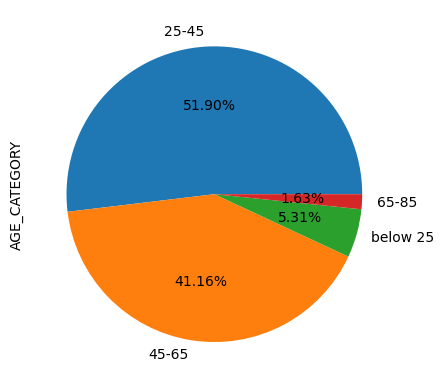

In [45]:
app_df["AGE_CATEGORY"].value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.show()

In [46]:
## Conclusion : Most of the applicants are between 25-45 age group ## 

In [47]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,AMT_CREDIT_CATEGORY,AGE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,1,9,5,medium credit,below 25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,3,0,NaN,25-45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,11,6,Very low credit,45-65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,8,26,6,low credit,45-65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54,8,11,9,medium credit,45-65


In [48]:
# Dividing application dataset with Target variable as 0 and 1
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [49]:
app_df.TARGET.value_counts(normalize=True)* 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [50]:
## Conclusion : 1 out of 9/10 applicant are defaults ##

In [51]:
# Univariate Analysis
cat_cols = list(app_df.columns[app_df.dtypes == np.object_])
num_cols = list(app_df.columns[app_df.dtypes == np.int64]) + list(app_df.columns[app_df.dtypes == np.float64])

In [52]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [53]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_PO

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


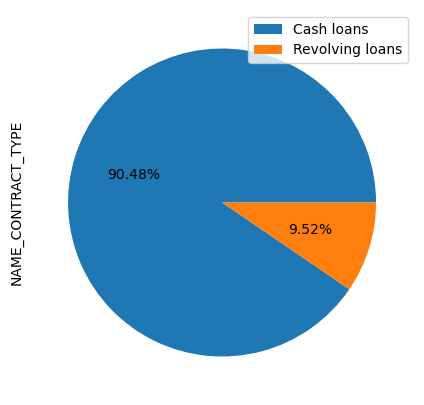

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


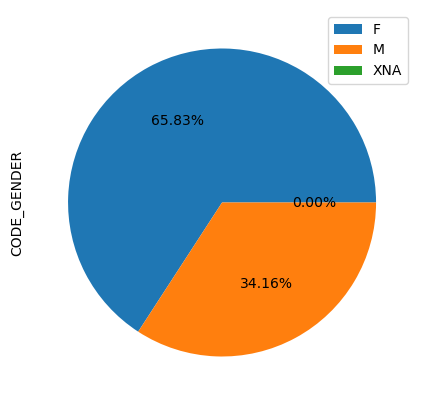

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


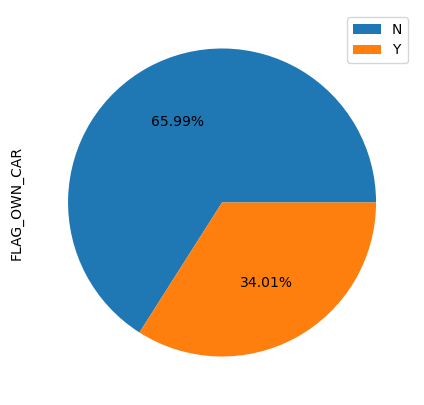

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


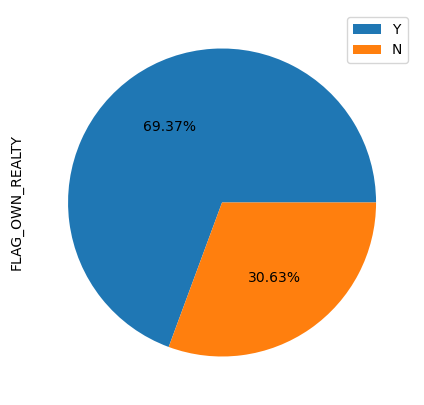

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


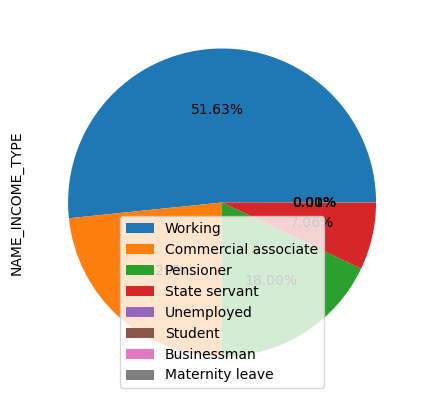

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


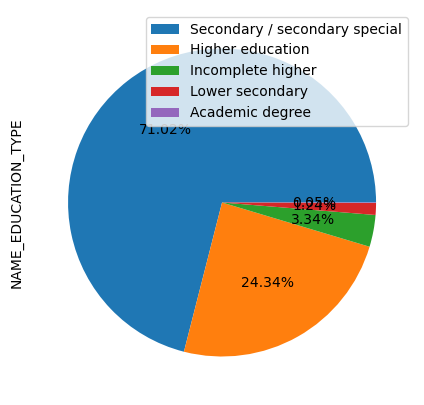

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


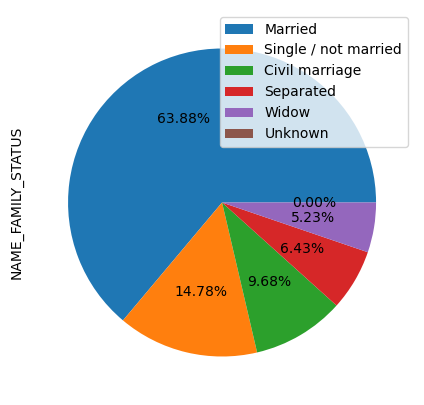

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


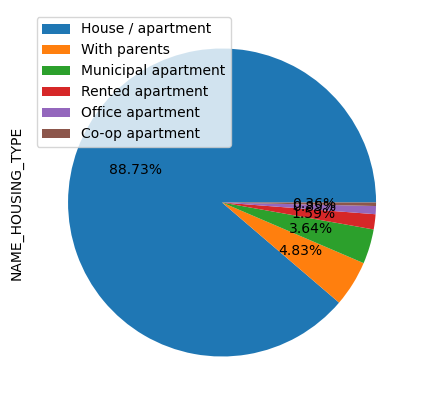

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


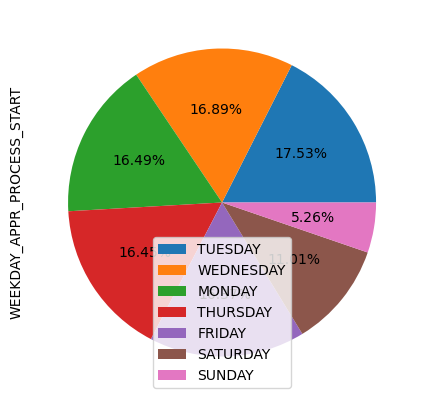

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

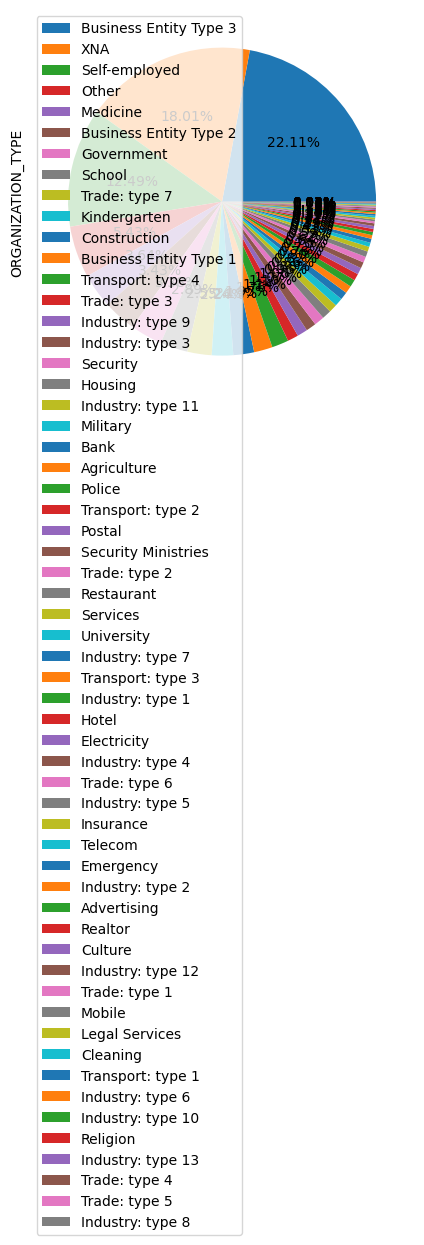

In [54]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance = None, autopct = '%1.2f%%')
    plt.legend()
    plt.show()

In [55]:
## Conclusion >>>>>> Insight on above columns : 
# 1. NAME_CONTRACT_TYPE - More applicant have the Cash loans than Revolving loans
# 2. CODE_GENDER - Number of Female applicants are twice than a Male applicants.
# 3. FLAG_OWN_CAR - Most (66%) of the applicants do not own a car.
# 4. FLAG_OWN_REALTY - Most (70%) of the applicants do not own a car.
# 5. NAME_INCOME_TYPE - Most (51%) of the applicants are earning their income from working.
# 6. NAME_EDUCATION_TYPE - 71% of the applicants have completed their secondary/ secondary special education
# 7. NAME_FAMILY_STATUS - 64% of the applicants are married.
# 8. NAME_HOUSING_TYPE - 89% of the applicants are lived in House/Apartment.
# 9. WEEKDAY_APPR_PROCESS_START - Most of the applicants have applied the loan on Tuesday.
# 10. ORGANIZATION_TYPE - Most (22%) of the ORGANIZATION_TYPE of employees are Business Entity type 3.


In [56]:
# Plot on numerical columns
# Categorizing columns with and without flag

In [57]:
num_cols_withflag = []
num_cols_withoutflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
          num_cols_withoutflag.append(col)
        

In [58]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [59]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


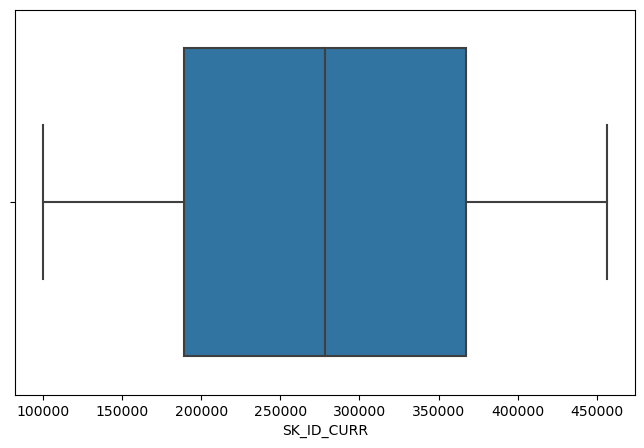

------------------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


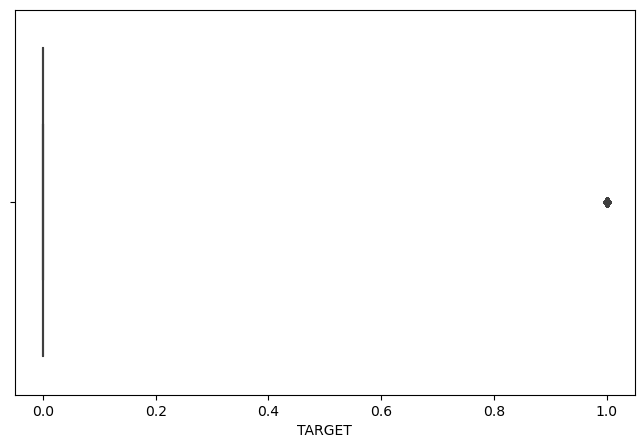

------------------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


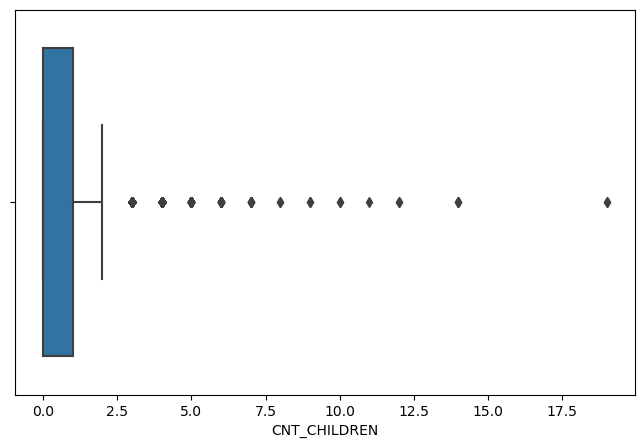

------------------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


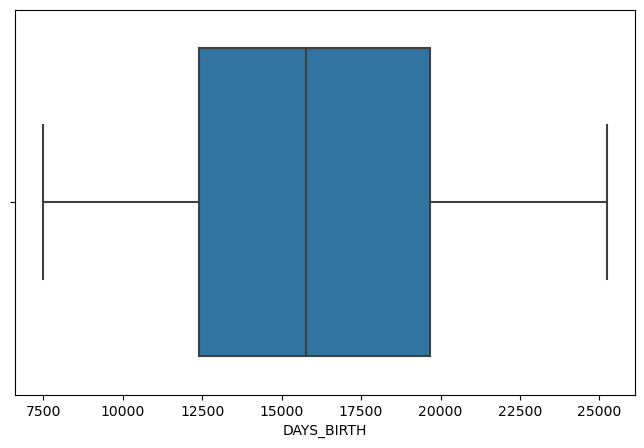

------------------------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


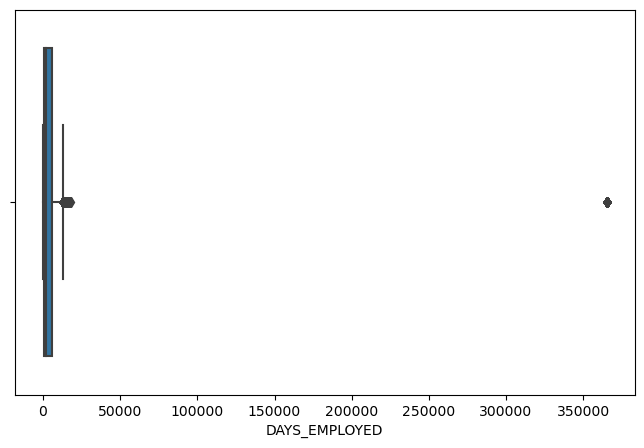

------------------------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


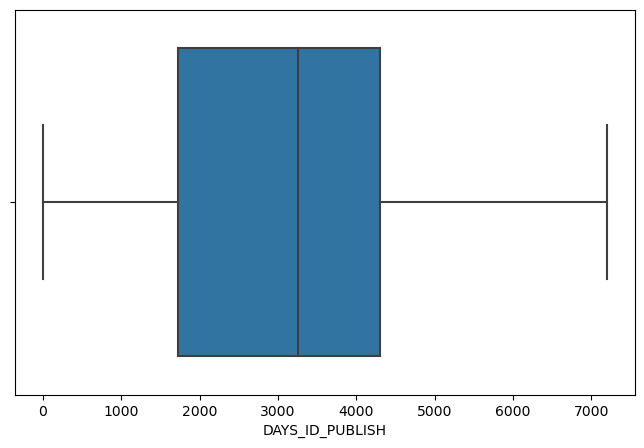

------------------------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


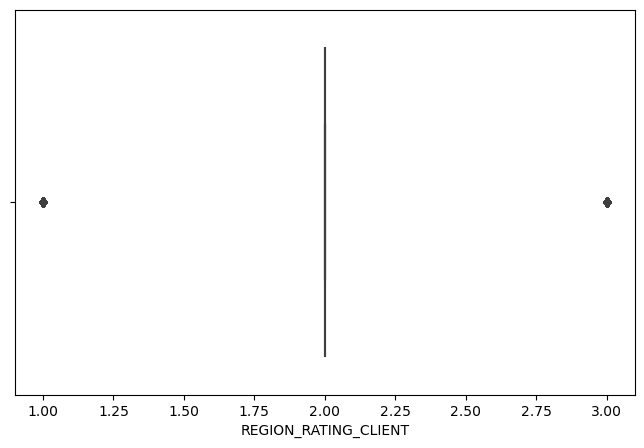

------------------------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


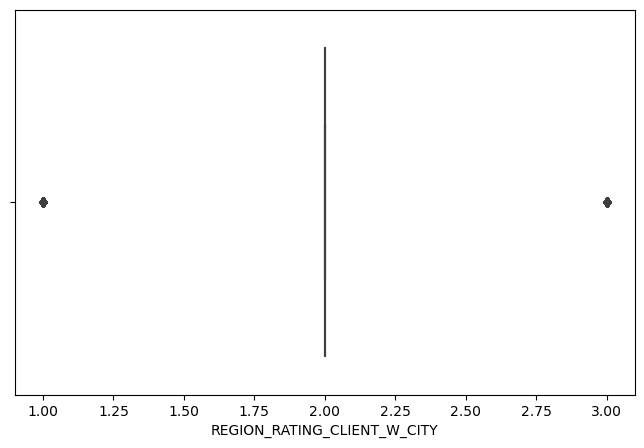

------------------------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


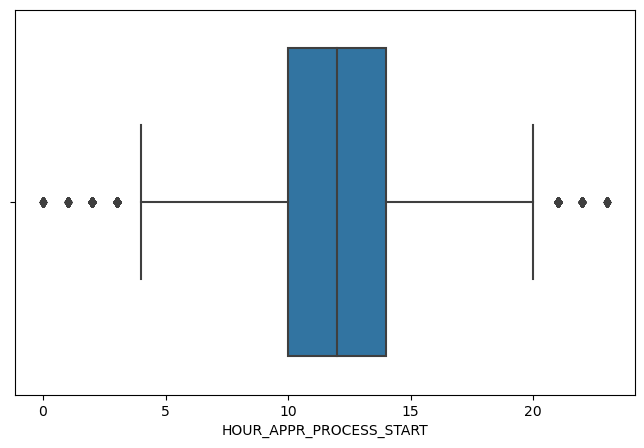

------------------------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


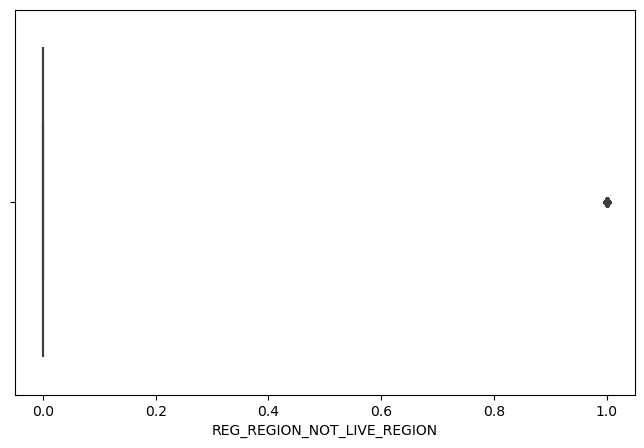

------------------------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


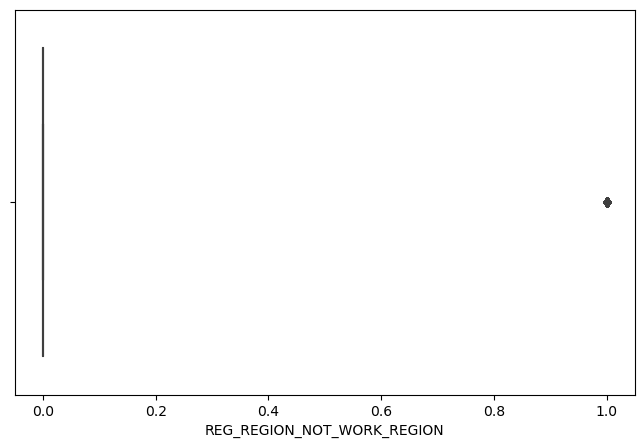

------------------------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


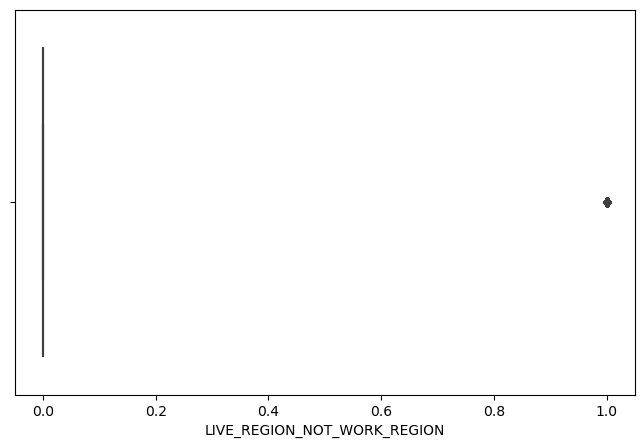

------------------------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


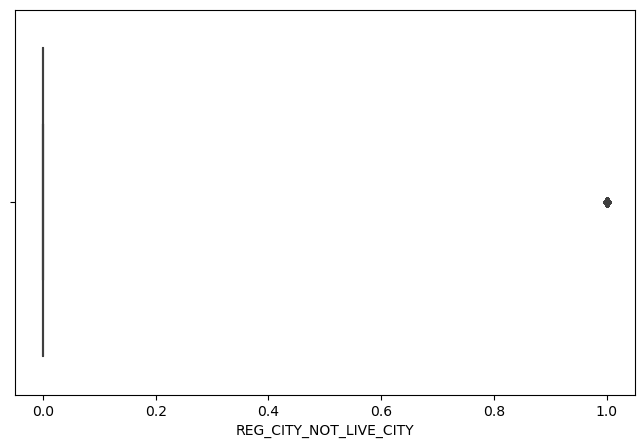

------------------------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


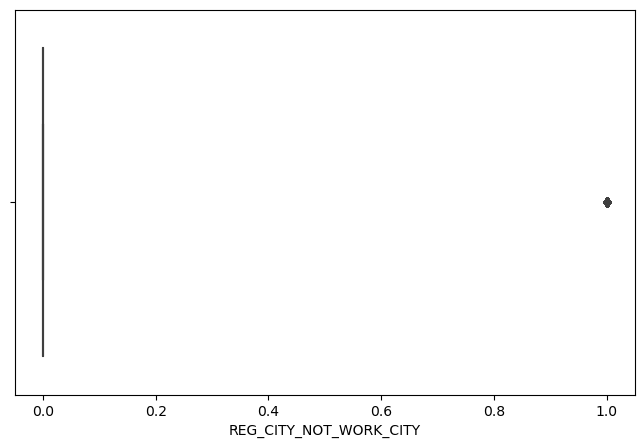

------------------------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


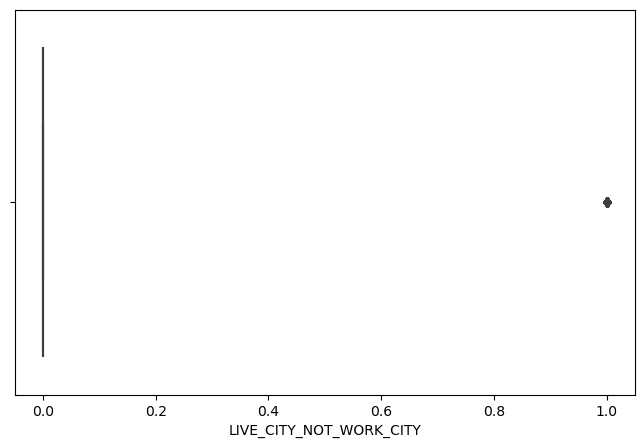

------------------------------
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


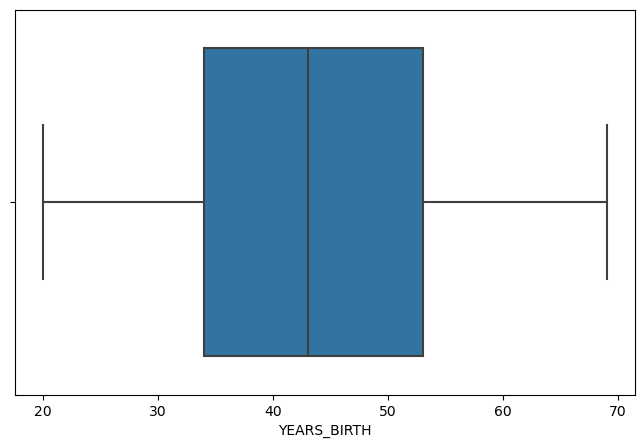

------------------------------
count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


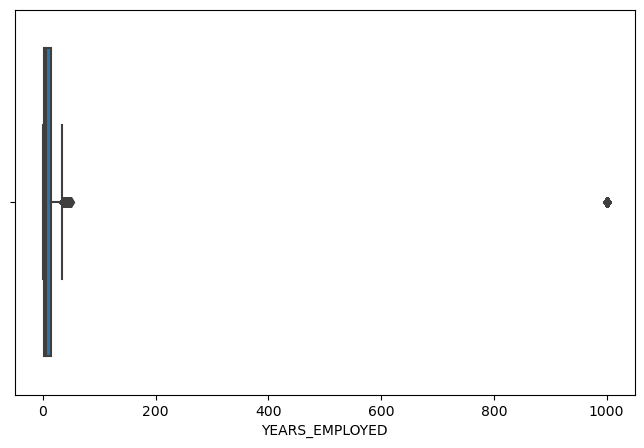

------------------------------
count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


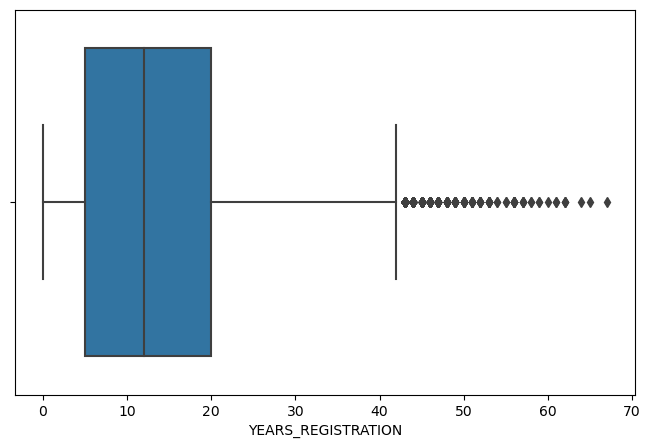

------------------------------
count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


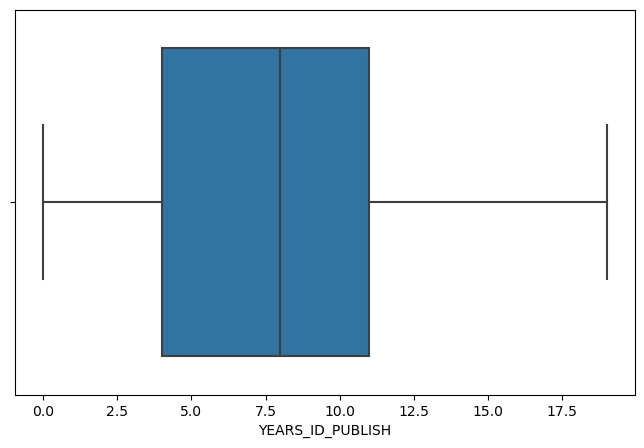

------------------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


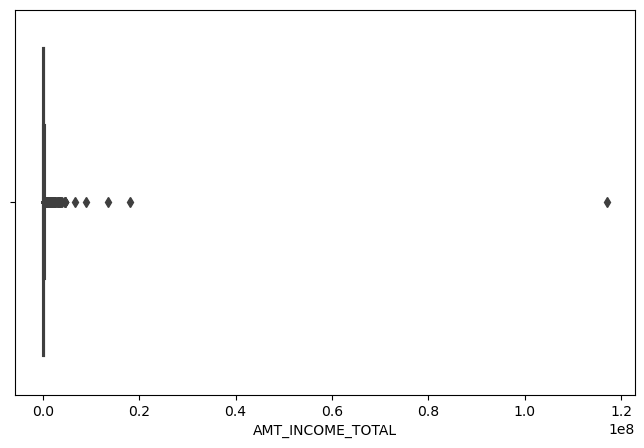

------------------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


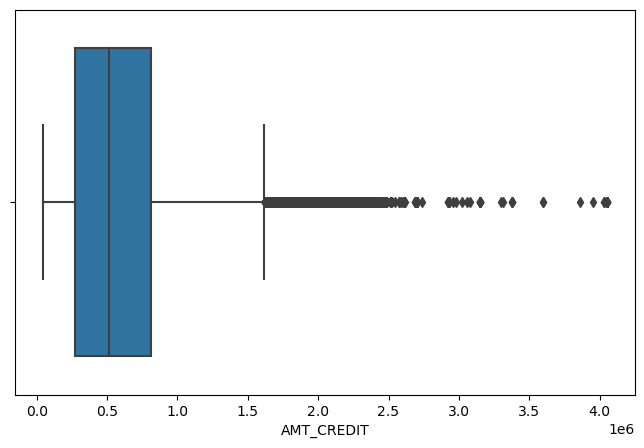

------------------------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


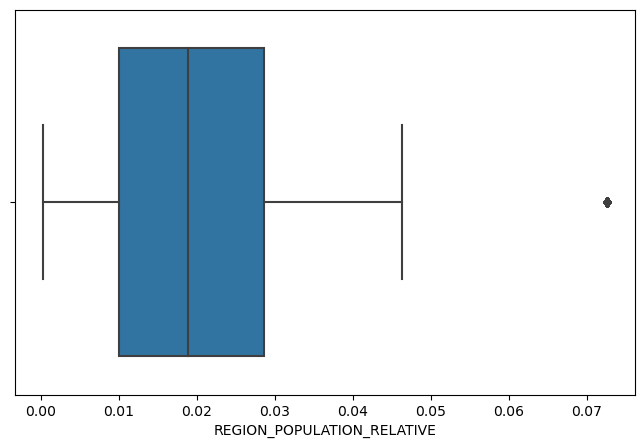

------------------------------
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


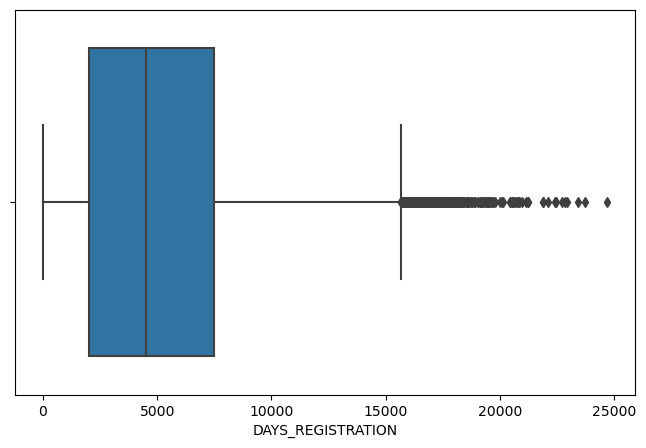

------------------------------


In [60]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize= [8,5])
    sns.boxplot(data=app_df, x=col)
    plt.show()
    print("------------------------------")

In [61]:
# Conclusion >>>>>> Few Columns are with outliers are below.
# 1 AMT_INCOME_TOTAL column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge variation in mean and median due to outliers.

# 2 AMT_CREDIT  column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge variation in mean and median due to outliers.

# 3 AMT_ANNUITY  column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge significant variation in mean and median due to outliers.

# 4 AMT_GOODS_PRICE  column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge significant variation in mean and median due to outliers.

# 5 REGION_POPULAION_RELATIVE column has a one outliers and there not much difference between mean and median

In [62]:
# Univariate Analysis on columns with Target 0 and 1

Plot on NAME_CONTRACT_TYPE for Target 0 and 1


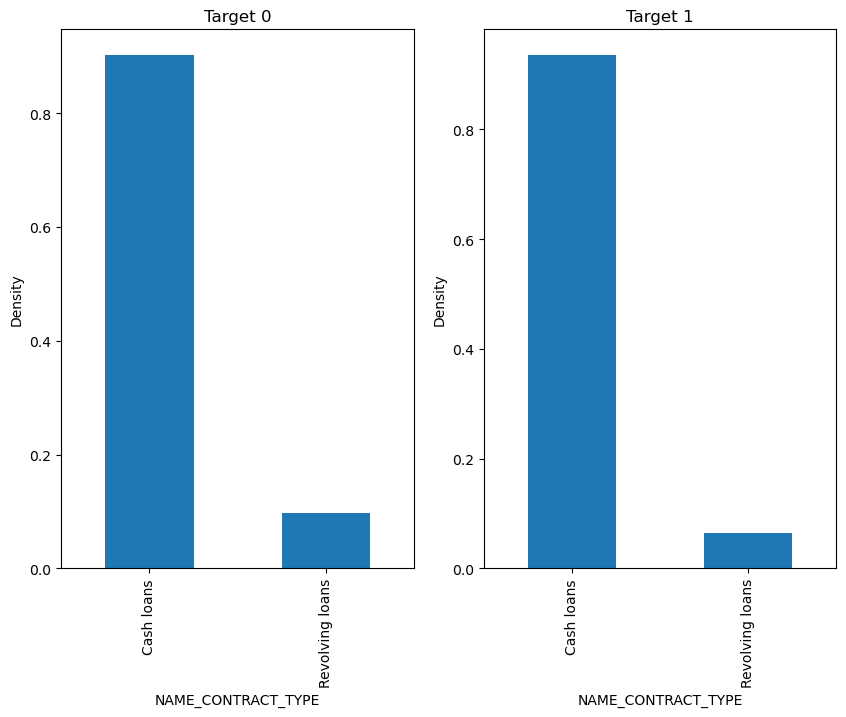



 ------------------------------


Plot on CODE_GENDER for Target 0 and 1


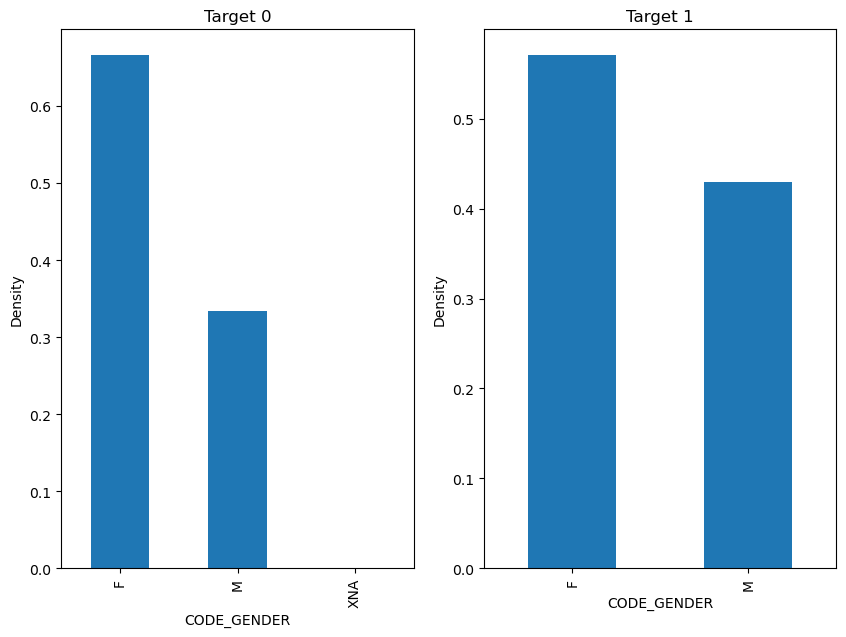



 ------------------------------


Plot on FLAG_OWN_CAR for Target 0 and 1


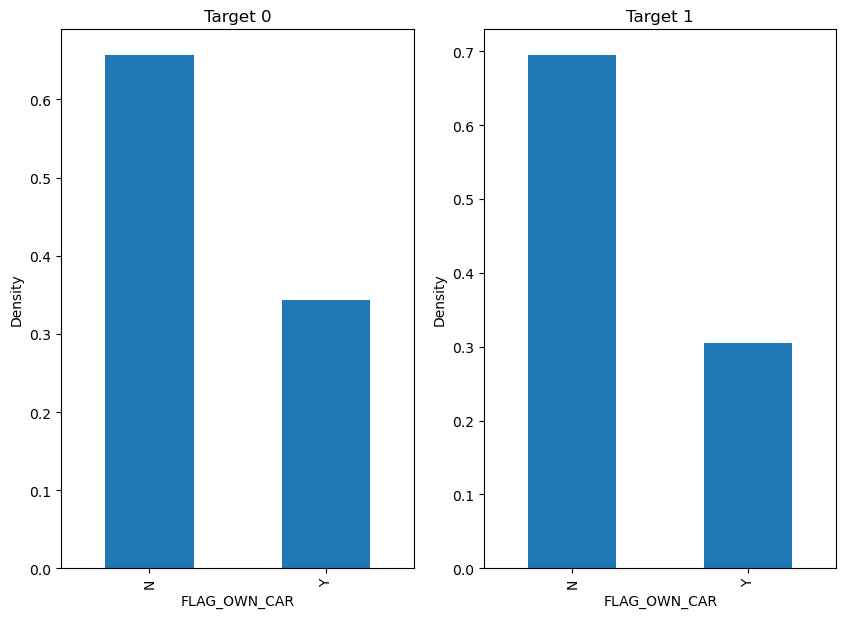



 ------------------------------


Plot on FLAG_OWN_REALTY for Target 0 and 1


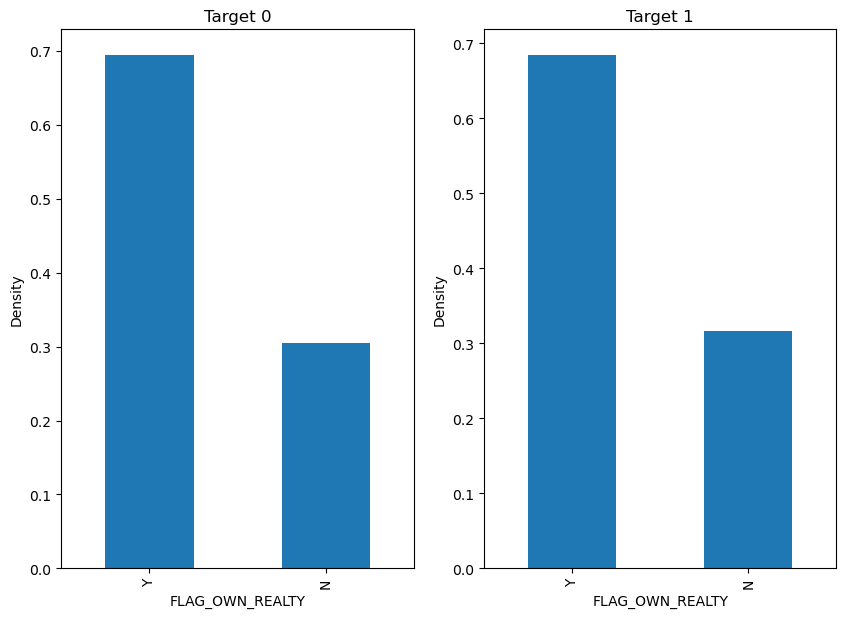



 ------------------------------


Plot on NAME_INCOME_TYPE for Target 0 and 1


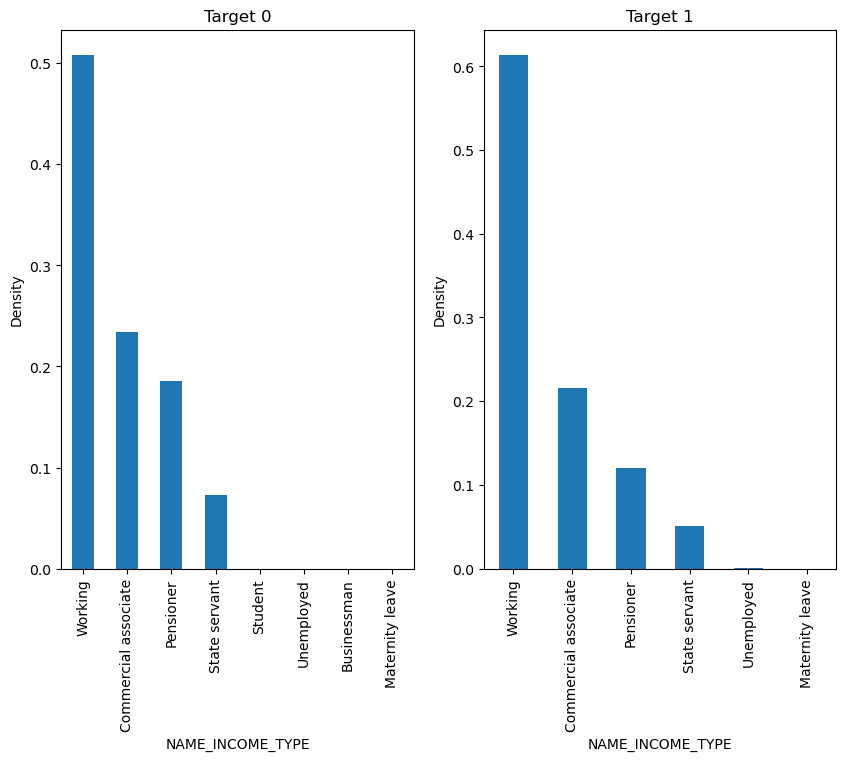



 ------------------------------


Plot on NAME_EDUCATION_TYPE for Target 0 and 1


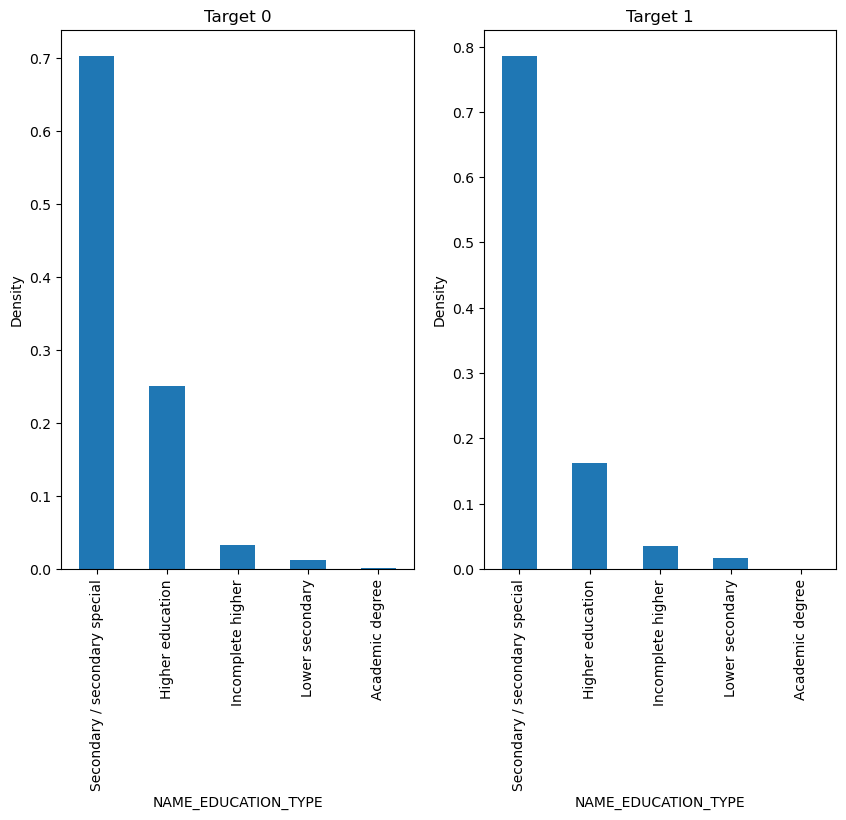



 ------------------------------


Plot on NAME_FAMILY_STATUS for Target 0 and 1


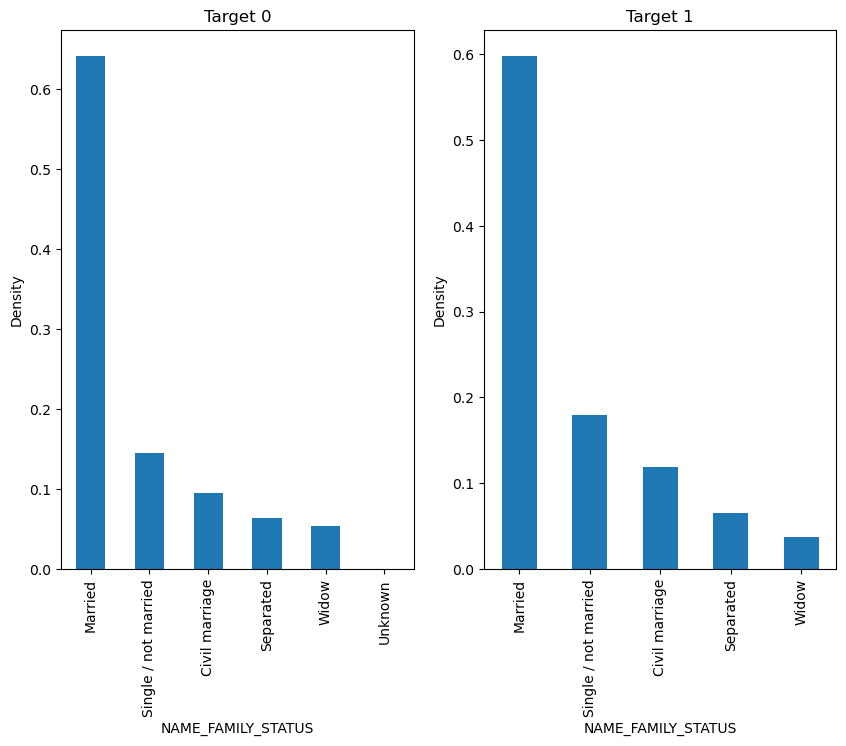



 ------------------------------


Plot on NAME_HOUSING_TYPE for Target 0 and 1


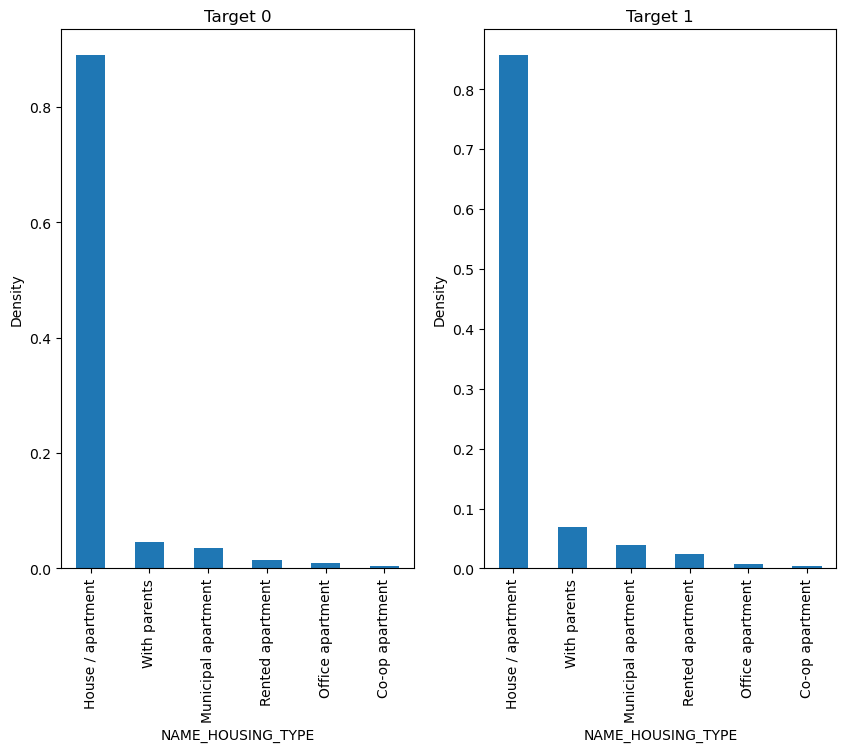



 ------------------------------


Plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


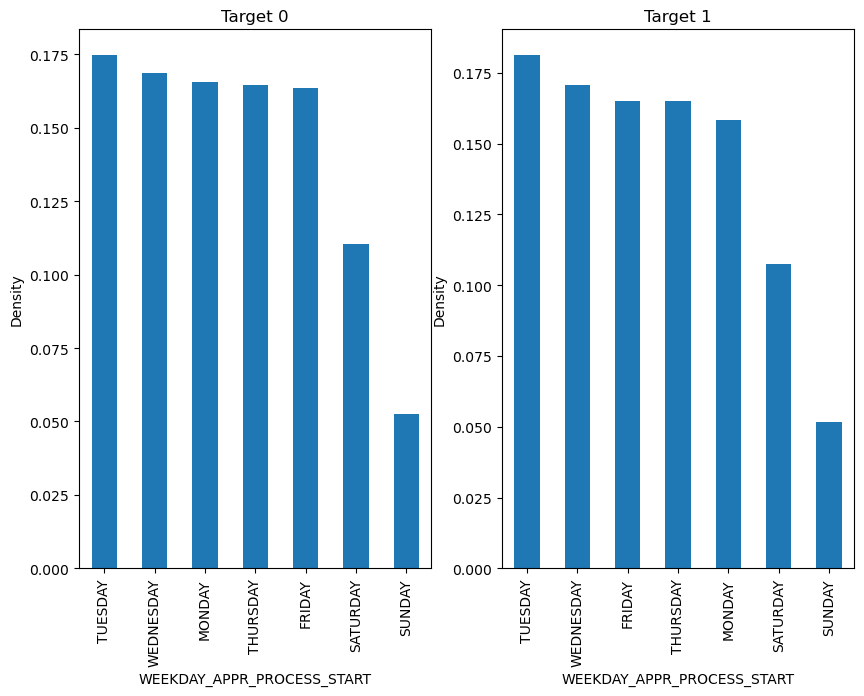



 ------------------------------


Plot on ORGANIZATION_TYPE for Target 0 and 1


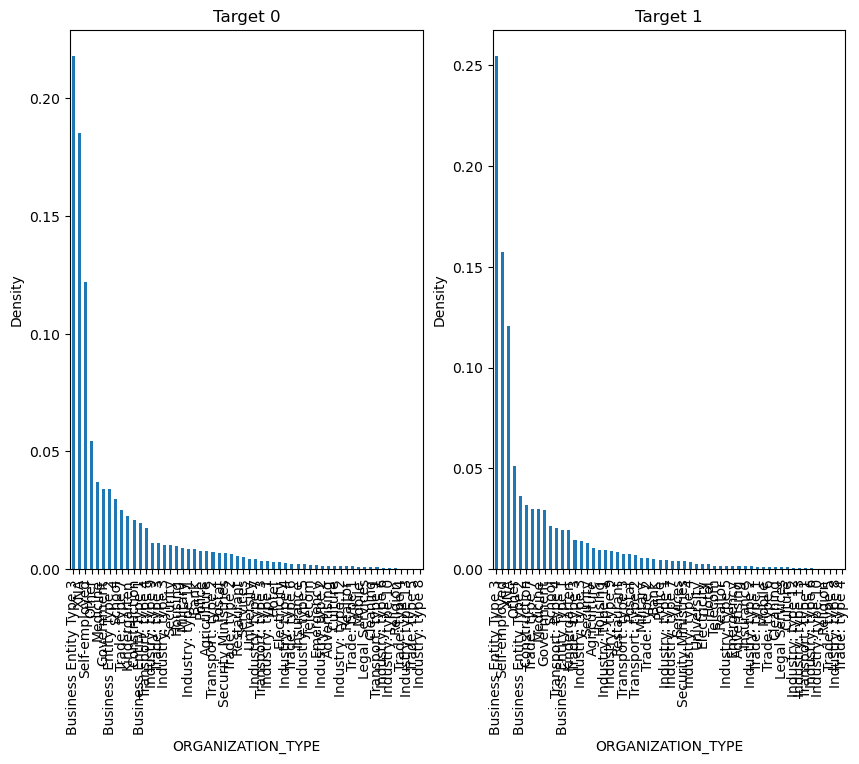



 ------------------------------




In [63]:
for col in cat_cols:
    print(f"Plot on {col} for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n ------------------------------\n\n")

In [64]:
## Conclusion >>>>>> Insight on above columns :
# 1. NAME_CONTRACT_TYPE - The applicants are receiving more Cash loan than Revolving loan both Target 0 and 1
# 2. CODE_GENDER - Number of Female applicants are twice than a Male applicants both for Target 0 and 1.
# 3. FLAG_OWN_CAR - Most (66%) of the applicants do not own a car for both Target 0 and 1.
# 4. FLAG_OWN_REALTY - Most (70%) of the applicants do not own a car both Target 0 and 1.
# 5. NAME_INCOME_TYPE - Most (51%) of the applicants are earning their income from working both Target 0 and 1.
# 6. NAME_EDUCATION_TYPE - 71% of the applicants have completed their secondary/ secondary special education both Target 0 and 1
# 7. NAME_FAMILY_STATUS - 64% of the applicants are married for both Target 0 and 1.
# 8. NAME_HOUSING_TYPE - 89% of the applicants are lived in House/Apartment for both Target 0 and 1.
# 9. WEEKDAY_APPR_PROCESS_START - Most of the applicants have applied the loan on Tuesday and least on Sunday.
# 10. ORGANIZATION_TYPE - Most of the applicants are working in Business Entity Type 3, Self Employed and other organization type
 

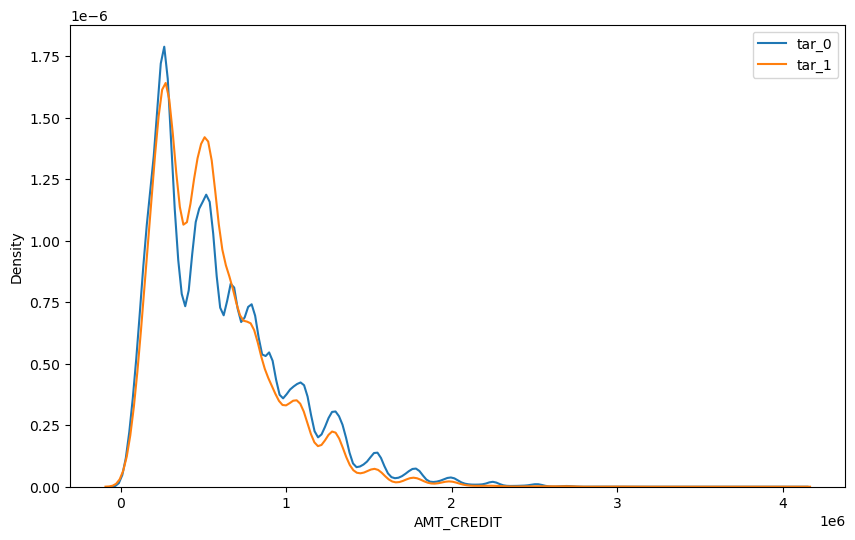

In [65]:
# Analysis on AMT_CREDIT
plt.figure(figsize=(10,6))
sns.distplot(tar_0["AMT_CREDIT"], label="tar_0", hist=False)
sns.distplot(tar_1["AMT_CREDIT"], label="tar_1", hist=False)
plt.legend()
plt.show()

In [66]:
##  Conclusion : The amount for which loan is given has the same variation for Target 0 and Target 1

In [67]:
# Bivariate and Multivariate Analysis
# Bivariate Analysis between WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

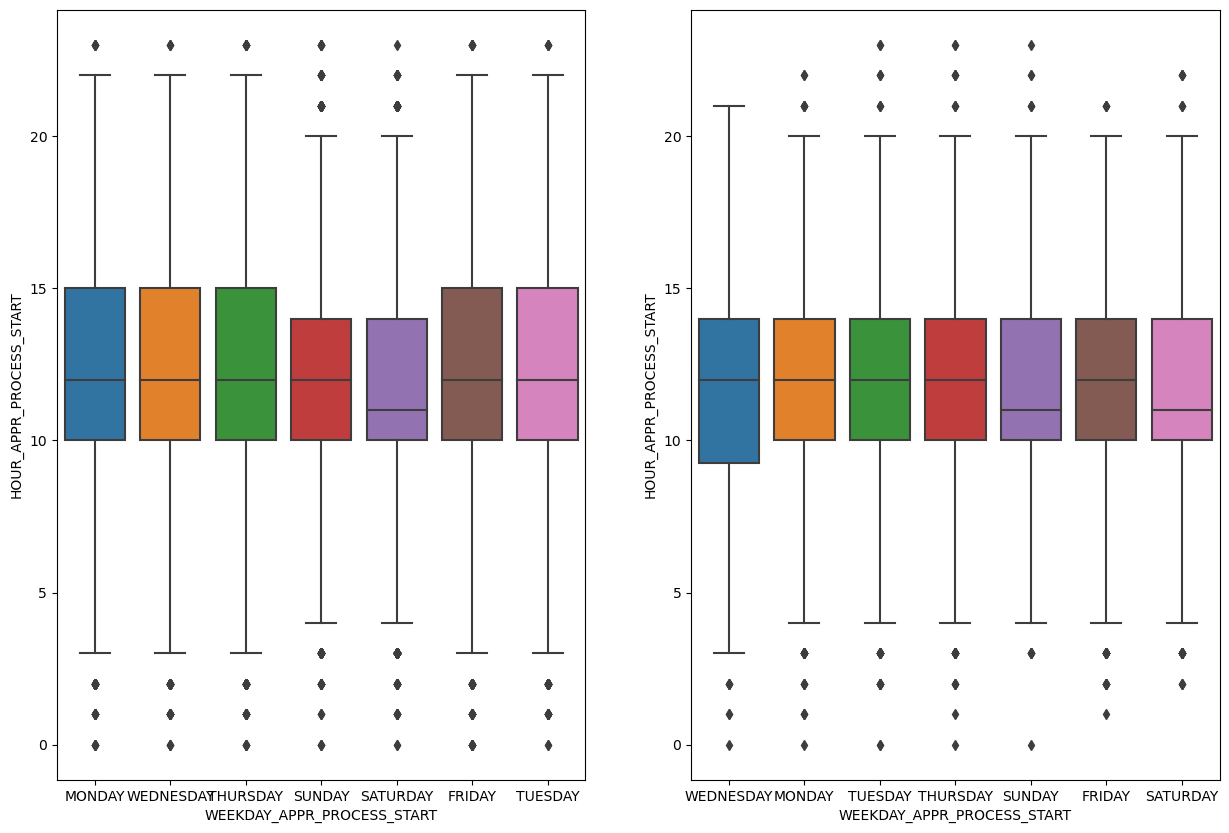

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', data=tar_1)
plt.show()

In [69]:
## Conclusion >>>>>> Insight on above plot :
# 1. The Bank operates between 10am to 3pm except for Saturday and Sunday its between 10am to 2pm
# 2. We can observe that around 11:30am to 12pm around 50% of customers visit the branch for loan
#    application on all the days except for Saturday where the time is between 10am to 11am for both TARGET 0 AND 1.
# 3. The loan defaulters have applied for the loan between 9:30am - 10am and 2pm where as the applicants wo repay the loan 
#    on time have applied for the loan between 10am to 3pm

In [70]:
# Bivariate Analysis between AGE_CATEGORY vs AMT_CREDIT

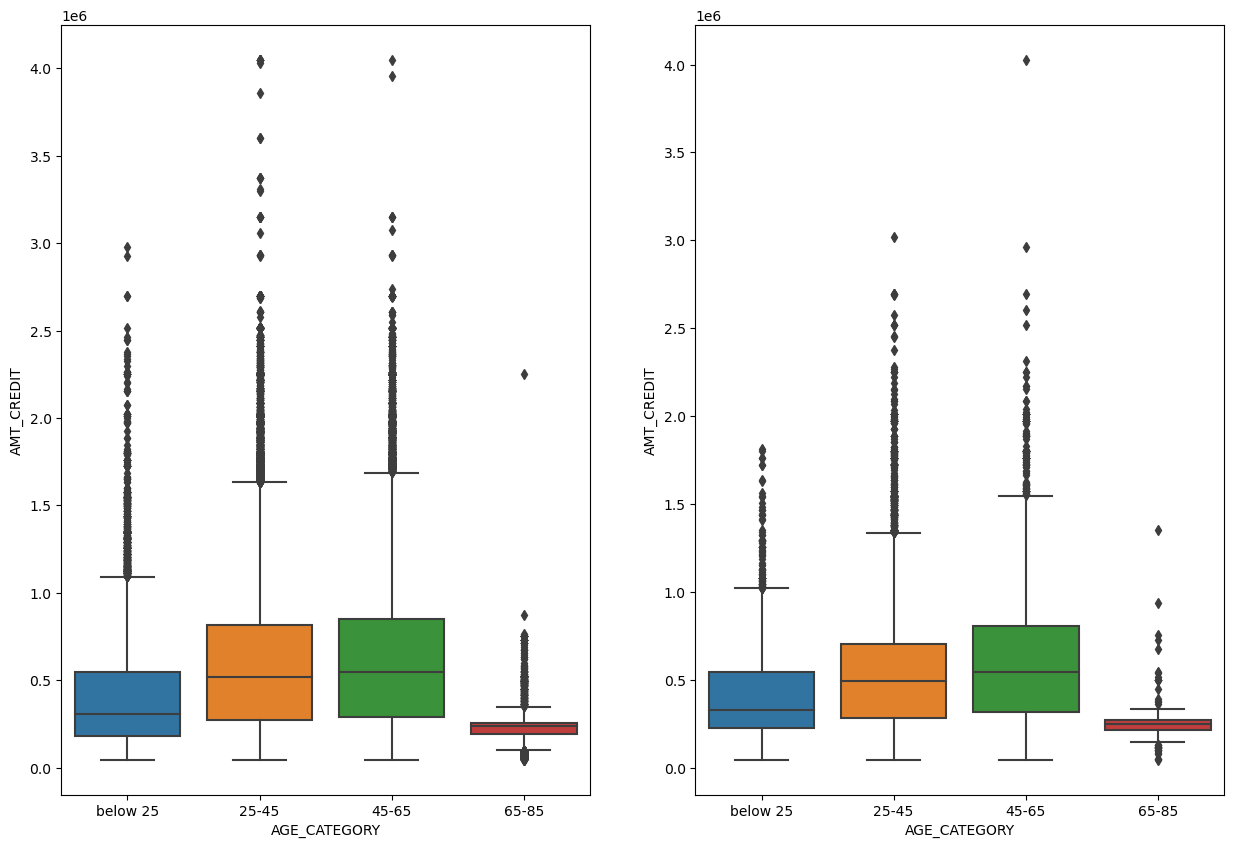

In [71]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='AGE_CATEGORY', y= 'AMT_CREDIT', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_CATEGORY', y= 'AMT_CREDIT', data=tar_1)
plt.show()

In [72]:
## Conclusion >>>>>> Insight on above plots :
# 1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan properly.
# 2. The applicants with less than 100000 credit amount are with age group greater than 65 may be considered as the loan defaulters.
# 3. Most of the spplicants who have credit amount of the loan less than 1700000 are loan defaulters with 25 and less age.

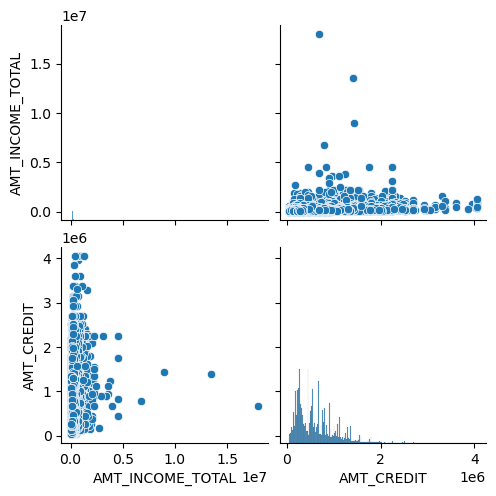

In [73]:
# Pair plot of Amount columns for Target 0
sns.pairplot(tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT"]])
plt.show()

In [74]:
# Conclusion : for applicant who are able to repay the loan on time
# AMT_IMCOME_TOTAL has a drastic slight increase in AMT_CREDIT

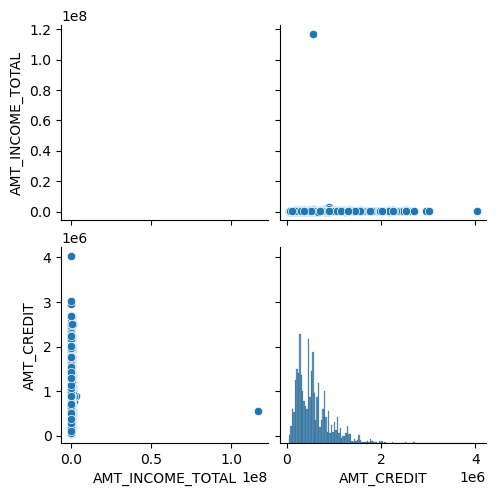

In [75]:
# Pair plot of Amount columns for Target 1
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT"]])
plt.show()

In [76]:
## Conclusion : for applicant who are unaable to repay the loan on time
# AMT_IMCOME_TOTAL has a equal as  AMT_CREDIT

In [77]:
# Co-relation between Numerical Columns

In [78]:
corr_data = app_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "YEARS_BIRTH", "YEARS_EMPLOYED", 
                    "YEARS_REGISTRATION", "YEARS_ID_PUBLISH"]]
corr_data.head()


,AMT_INCOME_TOTAL,AMT_CREDIT,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,202500.0,406597.5,25,1,9,5
1,270000.0,1293502.5,45,3,3,0
2,67500.0,135000.0,52,0,11,6
3,135000.0,312682.5,52,8,26,6
4,121500.0,513000.0,54,8,11,9


In [79]:
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
AMT_INCOME_TOTAL,1.000000,0.156870,-0.027226,-0.063836,-0.027783,-0.008648
AMT_CREDIT,0.156870,1.000000,0.055408,-0.064319,-0.009521,0.006831
YEARS_BIRTH,-0.027226,0.055408,1.000000,0.623879,0.331704,0.271453
YEARS_EMPLOYED,-0.063836,-0.064319,0.623879,1.000000,0.214592,0.274460
YEARS_REGISTRATION,-0.027783,-0.009521,0.331704,0.214592,1.000000,0.101373
YEARS_ID_PUBLISH,-0.008648,0.006831,0.271453,0.274460,0.101373,1.000000


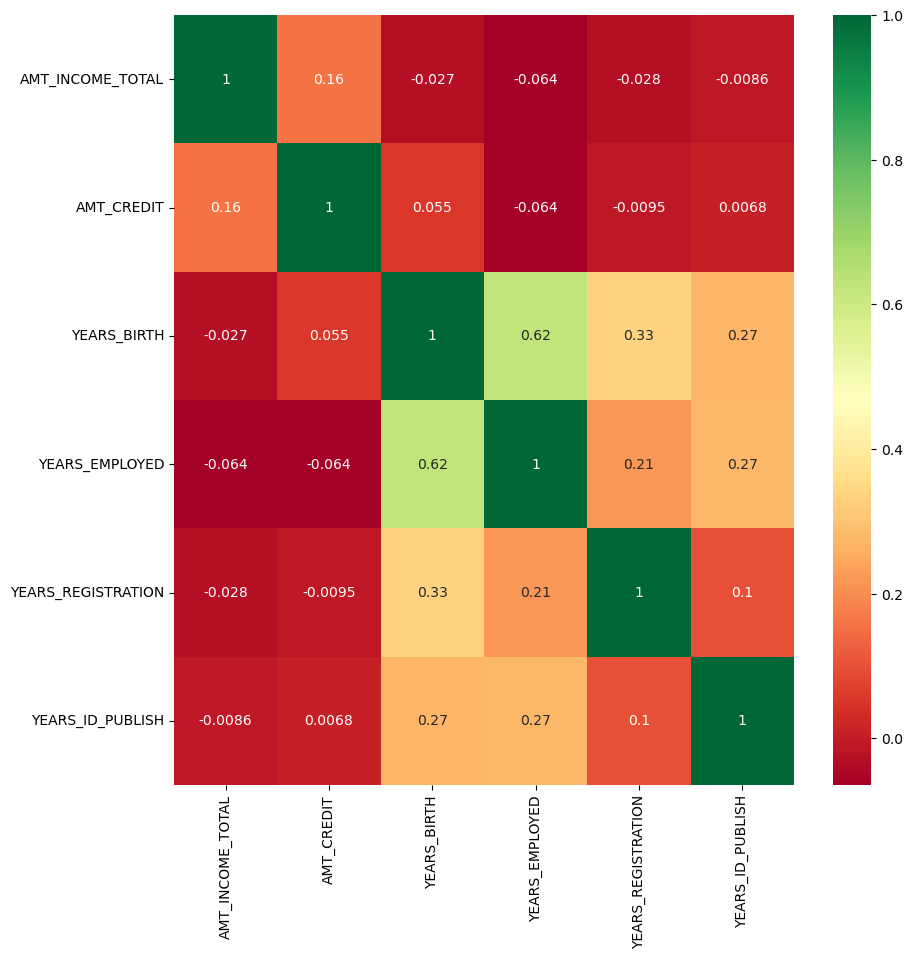

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True, cmap="RdYlGn")
plt.show()

In [81]:
# Split the Numerical variables based on Target 0 and 1 to find co-relation
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "YEARS_BIRTH", "YEARS_EMPLOYED", 
                    "YEARS_REGISTRATION", "YEARS_ID_PUBLISH"]]
corr_data_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
1,270000.0,1293502.5,45,3,3,0
2,67500.0,135000.0,52,0,11,6
3,135000.0,312682.5,52,8,26,6
4,121500.0,513000.0,54,8,11,9
5,99000.0,490495.5,46,4,13,1


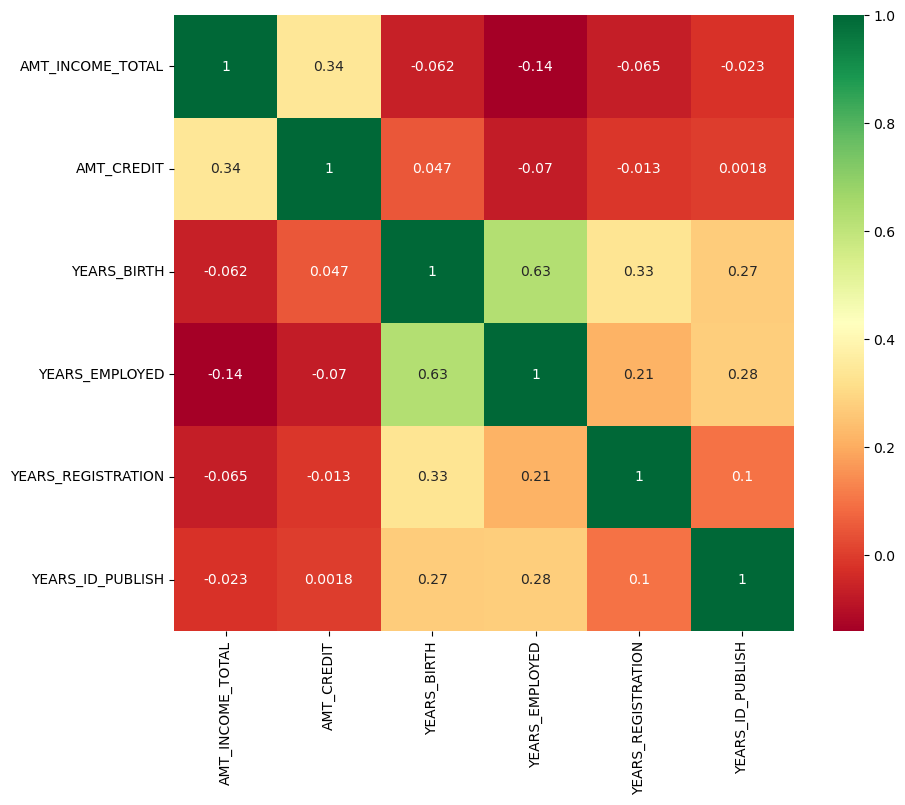

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_data_0.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [83]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "YEARS_BIRTH", "YEARS_EMPLOYED", 
                    "YEARS_REGISTRATION", "YEARS_ID_PUBLISH"]]
corr_data_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,202500.0,406597.5,25,1,9,5
26,112500.0,979992.0,51,7,18,5
40,202500.0,1193580.0,47,3,3,2
42,135000.0,288873.0,36,9,0,12
81,81000.0,252000.0,67,1000,14,11


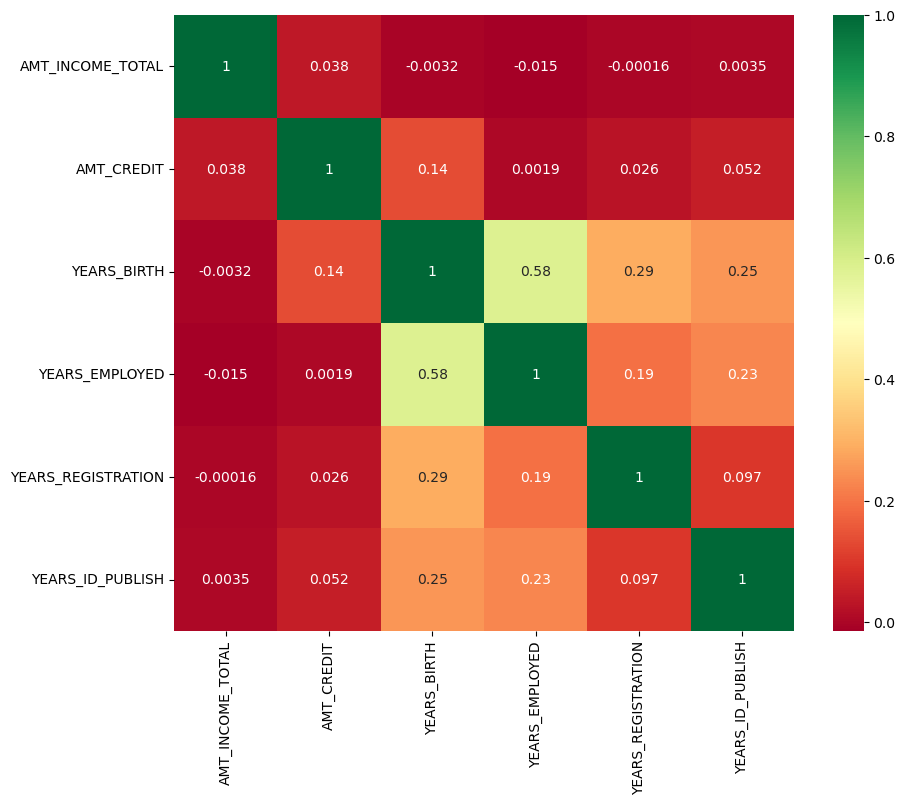

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_data_1.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [85]:
# Read Previous Application CSV
papp_data = pd.read_csv("previous_application.csv")
papp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Data Inspection on Previous Application Dataset
# Get info and shape on the dataset

In [87]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [88]:
papp_data.shape

(1670214, 37)

In [89]:
# Data Quality Check
# Check for percentage null values in application dataset

In [90]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [91]:
# Conclusion : column with null values more than 49% may give wrong insights, hence will drop them ##
# Dropping columns with missing values greater than 49%
percentage = 49
threshold_1 = int(((100 - percentage)/100)*papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis=1, how='any')
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,AMT_CREDIT_CATEGORY,AGE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,1,9,5,medium credit,below 25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,3,0,NaN,25-45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,11,6,Very low credit,45-65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,8,26,6,low credit,45-65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54,8,11,9,medium credit,45-65


In [92]:
papp_df.shape

(1670214, 21)

In [93]:
# Impute Missing Values 
# Check the dtype of missing values in Previous Application dataset before imputing

In [94]:
for col in papp_df.columns:
    if papp_df[col].dtypes ==np.int64 or papp_df[col].dtypes ==np.float64:
        papp_df[col] = papp_df[col].apply(lambda x: abs(x))

In [95]:
# Validate if any null values present in dataset
null_Cols = list(papp_data.columns[papp_data.isna().any()])
len(null_Cols)

16

In [96]:
papp_df.isnull().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64

In [97]:
# Binning of continuous values
# Binning AMT_CREDIT Column
papp_data.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [98]:
papp_data["AMT_CREDIT_CATEGORY"] = pd.cut(app_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000],
                                      labels= ["Very low credit", "low credit", "medium credit", "high credit", "very high credit"])

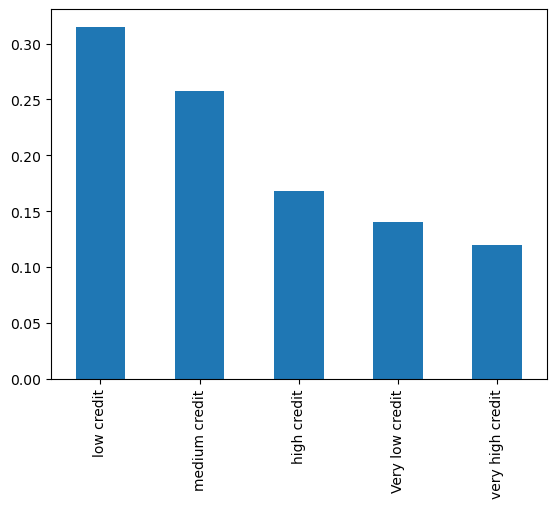

In [99]:
# Data visualization through "BAR GRAPH"
papp_data["AMT_CREDIT_CATEGORY"].value_counts(normalize=True).plot.bar()
plt.show() 

In [100]:
## Conclusion : The credit amount of the loan for most applicants is either low(200000 to 400000)

In [101]:
# Data Imbalance Check 
# Dividing Application Dataset with NAME_CONTRACT_STATUS

In [102]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == "Approved"]
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == "Cancelled"]
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Refused"]
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Unused offer"]

In [103]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

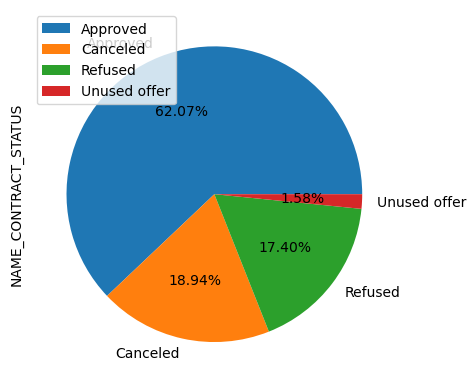

In [104]:
# Data visualization through "PIE CHART"
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.legend()
plt.show()

In [105]:
## Conclusion : 62% applicants have the loan approved
              # 19% applicant are canceled
              # 17% applicant are refused
              # 2% applicant are unused offer

In [106]:
# UNIVARIATE ANALYSIS
cat_cols = list(papp_df.columns[papp_df.dtypes == np.object_])
num_cols = list(papp_df.columns[papp_df.dtypes == np.int64]) + list(papp_df.columns[papp_df.dtypes ==
                                                                                    np.float64])

In [107]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [108]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_APPLICATION']

In [109]:
cat_cols = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE", "NAME_SELLER_INDUSTRY", "CHANNEL_TYPE", "NAME_YIELD_GROUP",
            "NAME_PRODUCT_TYPE"]

In [110]:
num_cols = ["HOUR_APPR_PROCESS_START", "DAYS_DECISION", "AMT_APPLICATION"]

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64


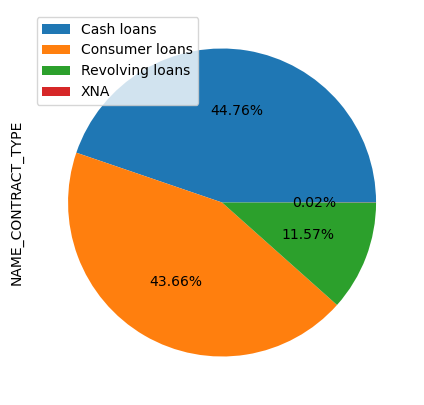

 ----------------- 
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


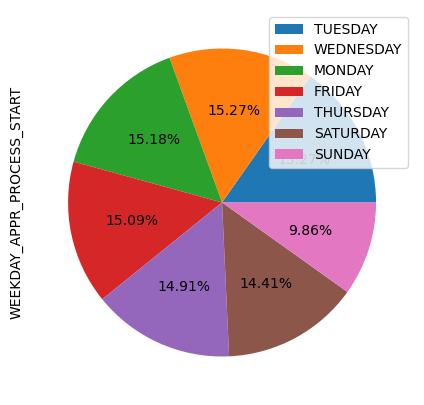

 ----------------- 
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


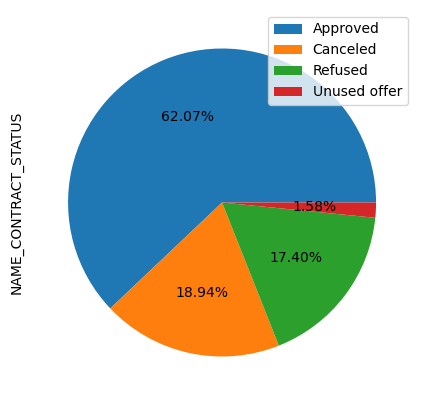

 ----------------- 
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64


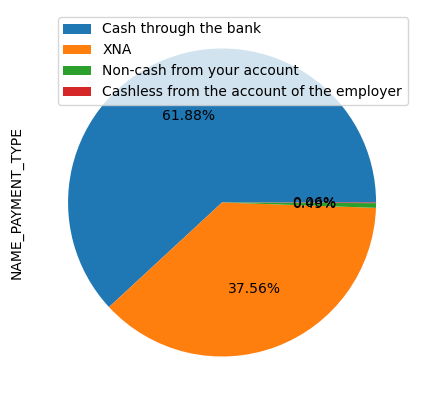

 ----------------- 
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64


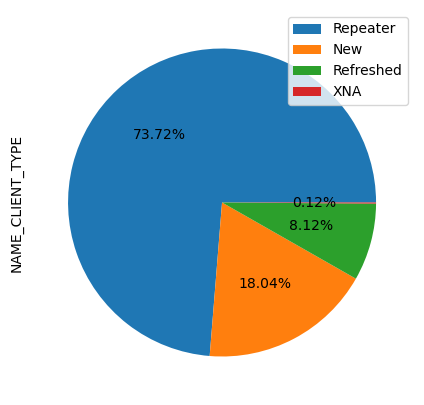

 ----------------- 
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64


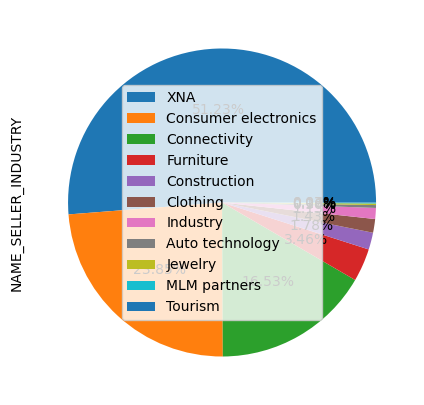

 ----------------- 
Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64


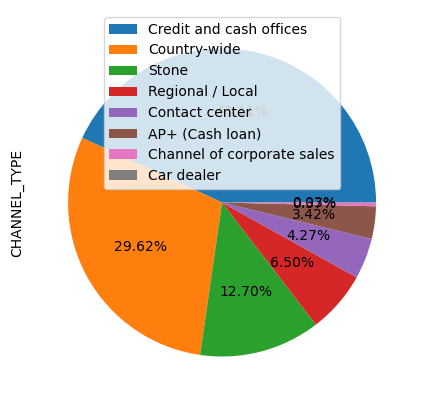

 ----------------- 
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64


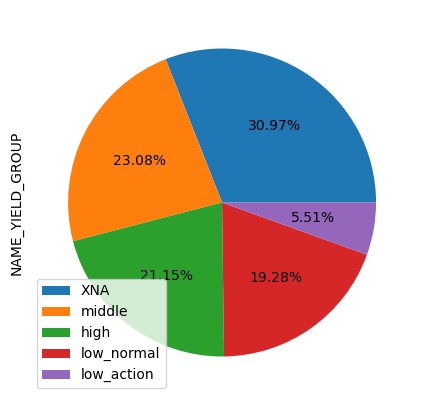

 ----------------- 
XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64


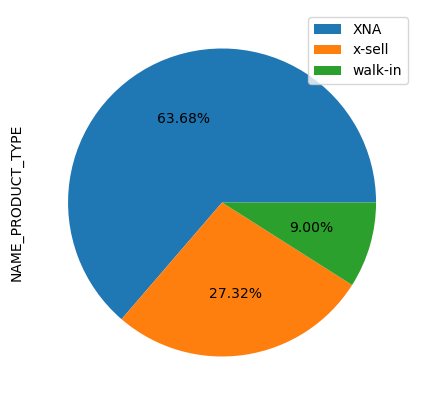

 ----------------- 


In [111]:
# Plot on Categorical Columns
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print(' ----------------- ')

In [112]:
## Conclusion >>>>>> Insight on above plots :
# 1. NAME_CONTRACT_TYPE - 45% of applicants received Cash loan, 44% of applicants received Consumer loan,
#    12% of applicants received Revolving loan during previous application 
# 2. WEEKDAY_APPR_PROCESS_START - All the days have almost equal number of previous loan applications.
# 3. NAME_CONTRACT_STATUS - 62% of applicants are approved, 19% cancelled, 17% refused and 2% unused.
# 4. NAME_PAYMENT_TYPE - 62% of payment type are Cash through bank and 385 other modes.
# 5. NAME_CLIENT_TYPE - 74% of applicants are repeater, 18% are new and 8% are refreshed.
# 6. NAME_SELLER_INDUSTRY - 515 are other industries, 24% are consumer electronics, 16% connectivity
# 7. CHANNEL_TYPE - 43% Channel Type is credit and cash offices, 295 are country-wide
# 8. NAME_YIELD_GROUP - Majority or Yield Group are others
# 9. NAME_PRODUCT_TYPE - 64% are others and 275 are x - sell

99th Percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


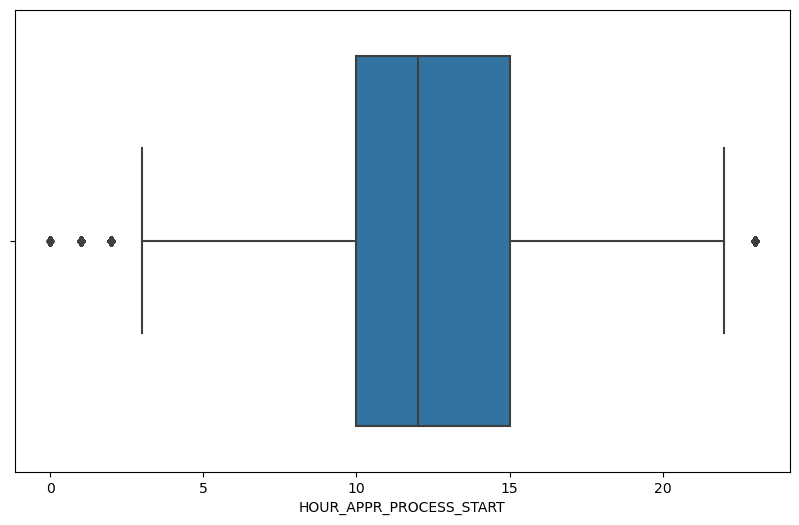

 ---------------------- 
99th Percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


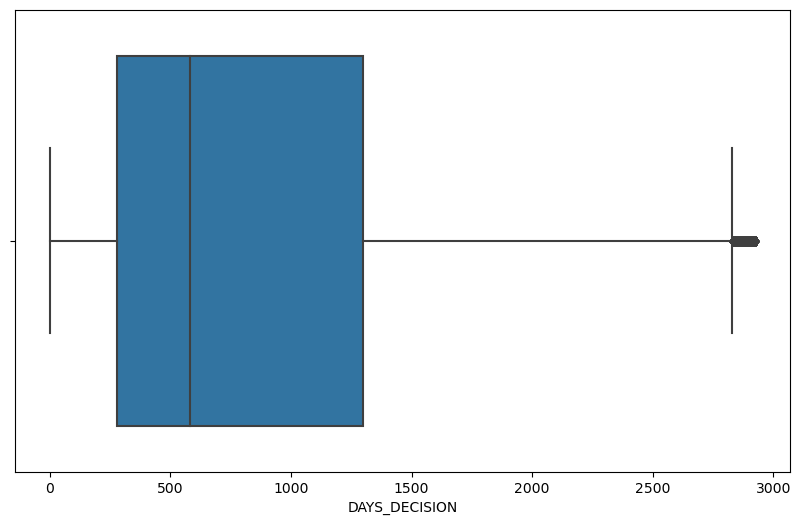

 ---------------------- 
99th Percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


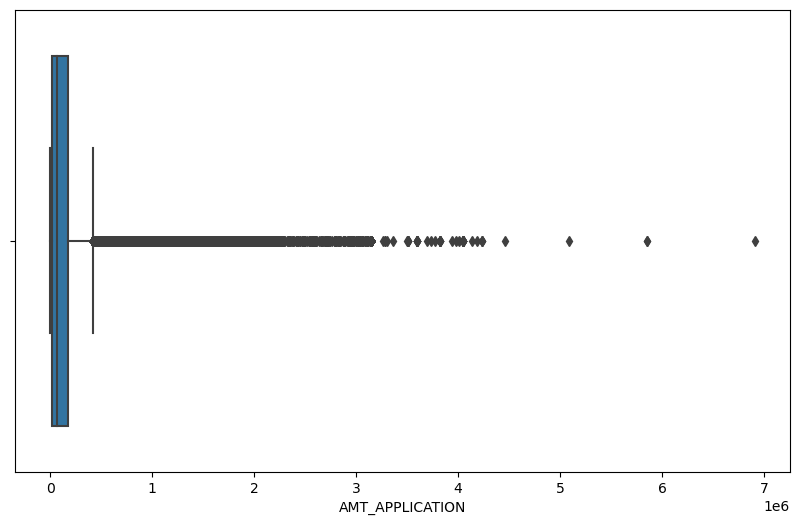

 ---------------------- 


In [113]:
# Plot on Numerical Columns
for col in num_cols:
    print("99th Percentile",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df,x=col)
    plt.show()
    print(' ---------------------- ')

In [114]:
# Conclusion >>>>>> Few Columns are with outliers are below.
# 1 HOUR_APPR_PROCESS_START column has a few outliers and there is a small difference mean and median

# 2 AMT_CREDIT  column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge variation in mean and median due to outliers.

# 3 AMT_ANNUITY  column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge significant variation in mean and median due to outliers.

# 4 AMT_GOODS_PRICE  column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge significant variation in mean and median due to outliers.

# 5 AMT_APPLICATION column has a few outliers and there is a huge difference between the 99th percentile
#   and the max value, also we could see huge variation in mean and median due to outliers.

# 6 CNT_PAYMENT column has few outliers and there is a small difference between mean and median.

# 7 DAYS_DECISION has few outliers and there is a small difference between mean and median. 

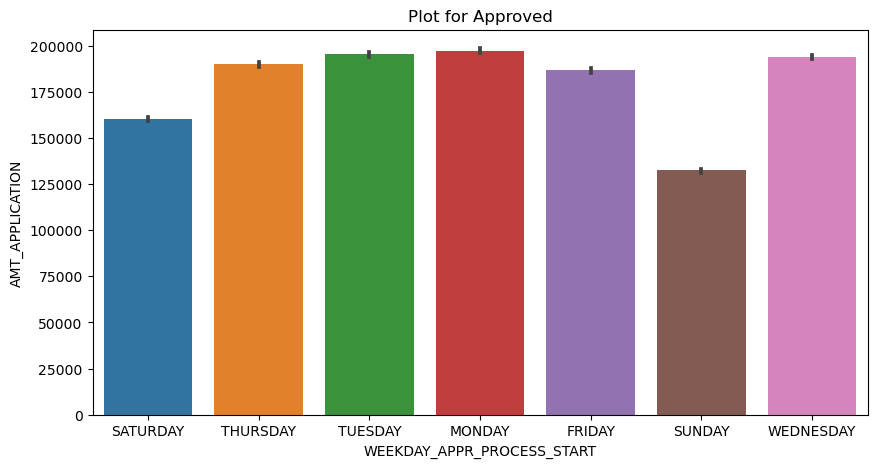

In [115]:
# Bivariate and Multivariate Analysis
# Bivariate analysis betwwen WEEKDAY_APPR_PROCESS_START vs AMT_APPLICATION
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y= 'AMT_APPLICATION',data=approved)
plt.title("Plot for Approved")
plt.show()

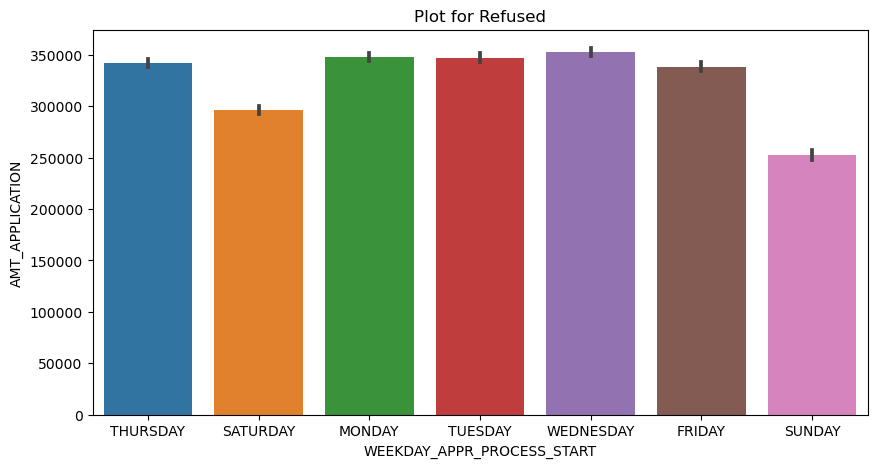

In [116]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y= 'AMT_APPLICATION',data=refused)
plt.title("Plot for Refused")
plt.show()

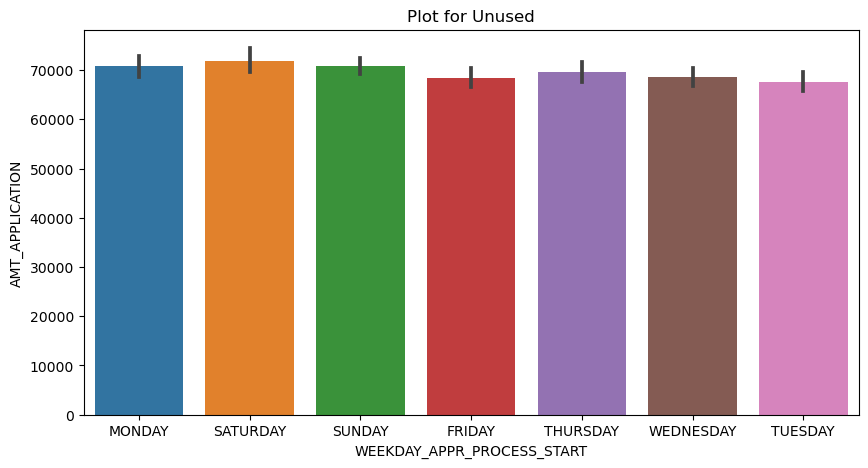

In [117]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y= 'AMT_APPLICATION',data=unused)
plt.title("Plot for Unused")
plt.show()

In [118]:
## Conclusion : >>>>>
# 1 The credit amount of applicants with approved status is high on monday and wednesday than other days and least on sunday
# 2 The credit amount of applicants with rejected status is least on sunday and more on monday and wednesday
# 3 The credit amount of applicants with unused offer status is almost equal on all days

In [119]:
# Bivariate Analysis between AMT_APPLICATION vs DAYS_DECISION

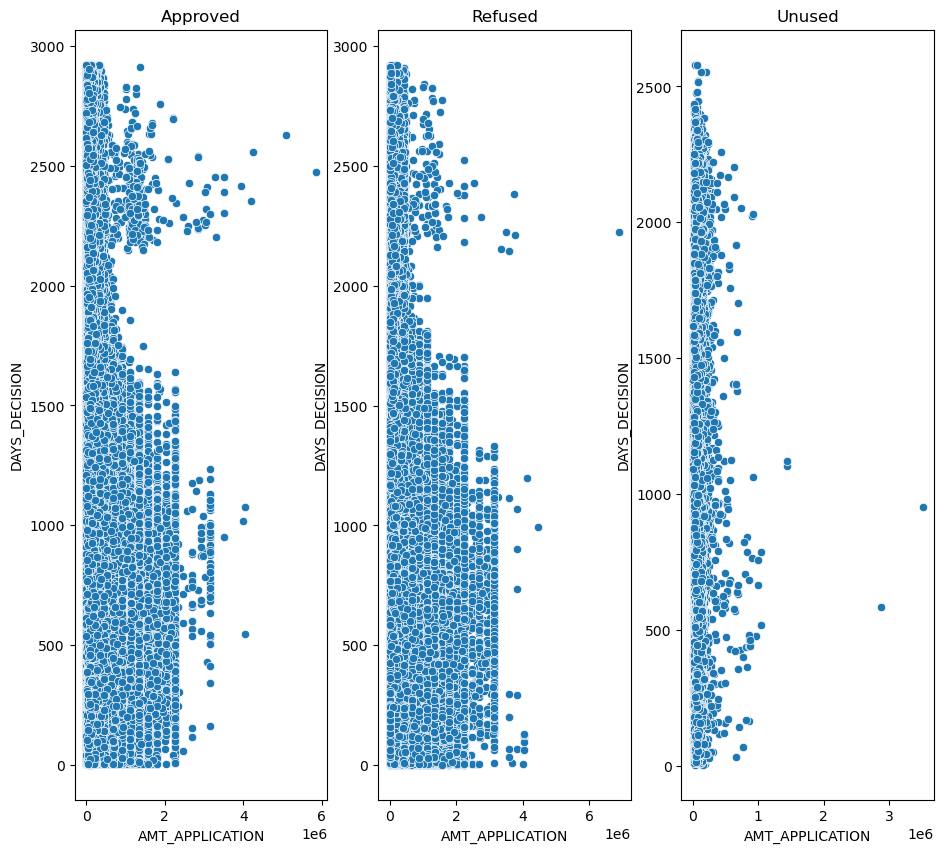

In [120]:
plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x='AMT_APPLICATION',y='DAYS_DECISION',data=approved)
plt.subplot(1,4,2)
plt.title("Refused")
sns.scatterplot(x='AMT_APPLICATION',y='DAYS_DECISION',data=refused)
plt.subplot(1,4,3)
plt.title("Unused")
sns.scatterplot(x='AMT_APPLICATION',y='DAYS_DECISION',data=unused)
plt.show()

In [121]:
# Co-relation between Numerical Columns

In [122]:
corr_approved = approved[["DAYS_DECISION","AMT_APPLICATION","SELLERPLACE_AREA","NFLAG_LAST_APPL_IN_DAY",
                          "HOUR_APPR_PROCESS_START"]]
corr_refused = refused[["DAYS_DECISION","AMT_APPLICATION","SELLERPLACE_AREA","NFLAG_LAST_APPL_IN_DAY",
                          "HOUR_APPR_PROCESS_START"]]
corr_unused = unused[["DAYS_DECISION","AMT_APPLICATION","SELLERPLACE_AREA","NFLAG_LAST_APPL_IN_DAY",
                          "HOUR_APPR_PROCESS_START"]]
        


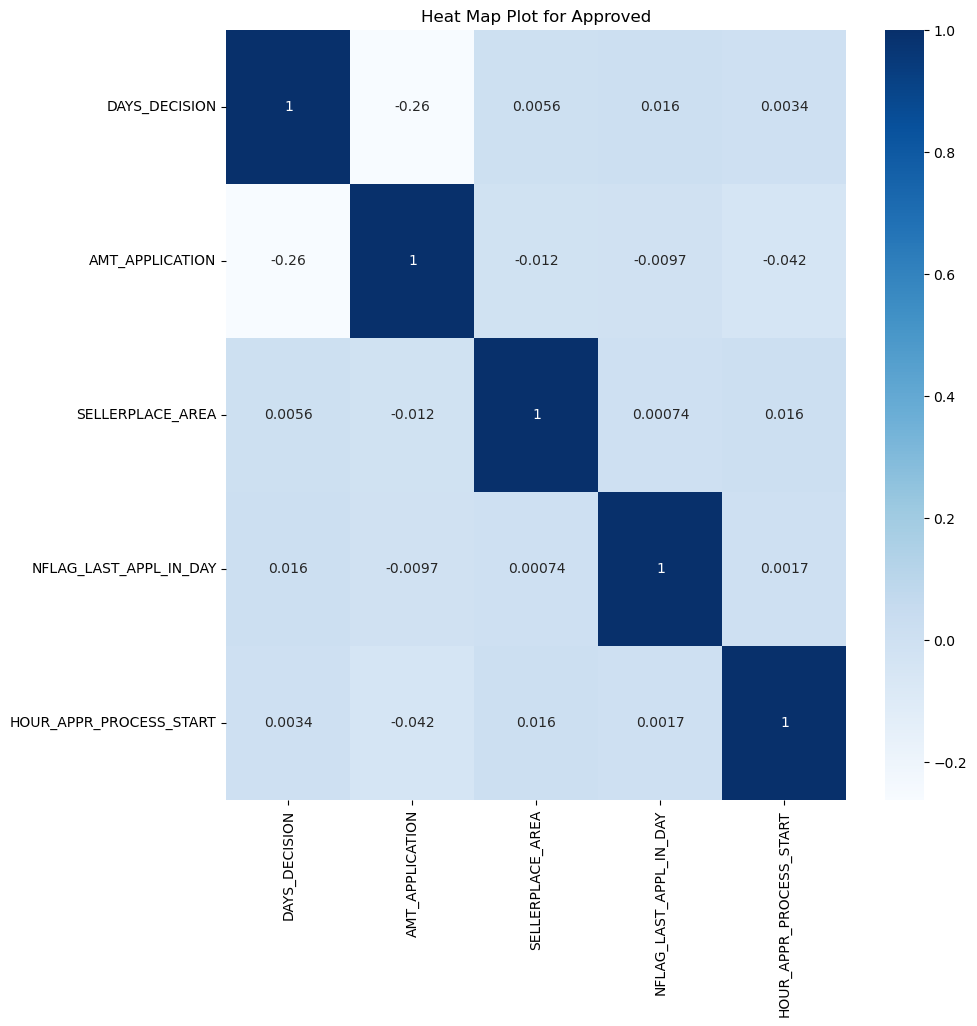

In [123]:
# Co-relation for Numerical Columns for Approved
plt.figure(figsize=[10,10])
sns.heatmap(corr_approved.corr(),annot=True,cmap="Blues")
plt.title("Heat Map Plot for Approved")
plt.show()

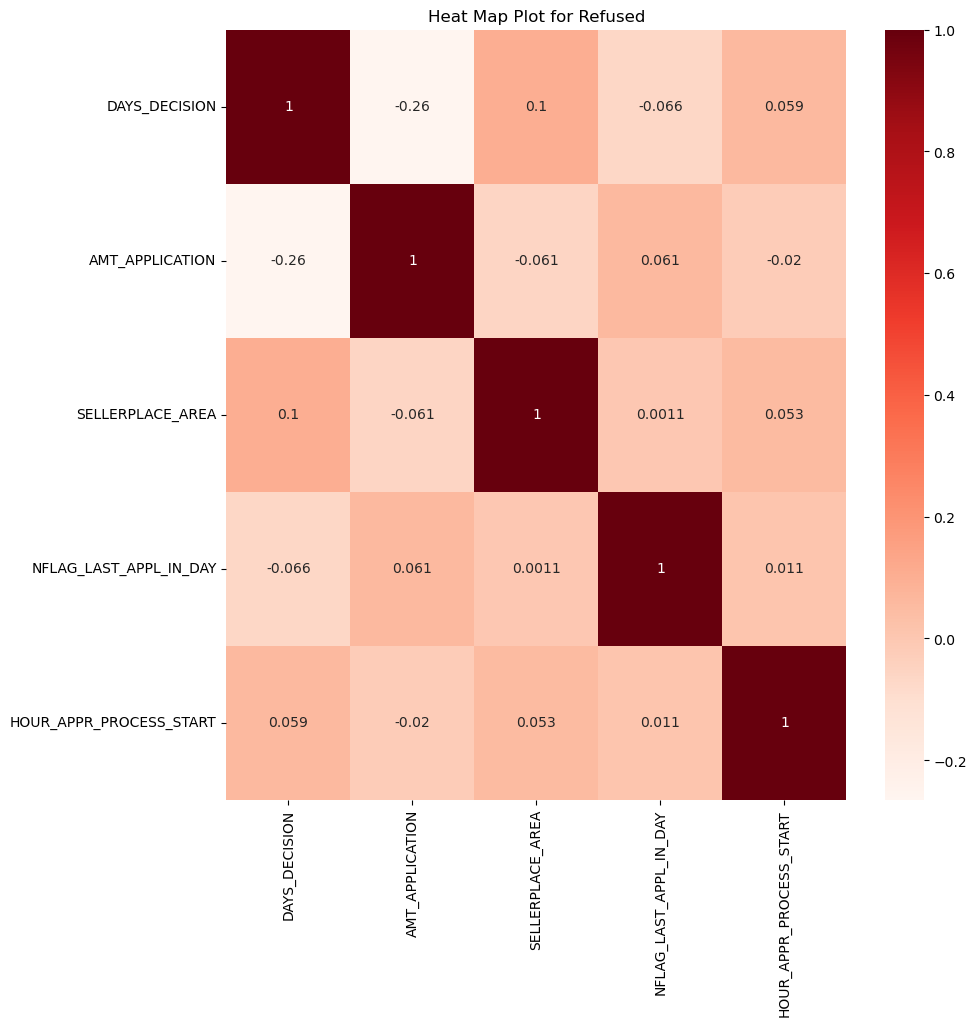

In [124]:
# Co-relation for Numerical Columns for refused
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused.corr(),annot=True,cmap="Reds")
plt.title("Heat Map Plot for Refused")
plt.show()

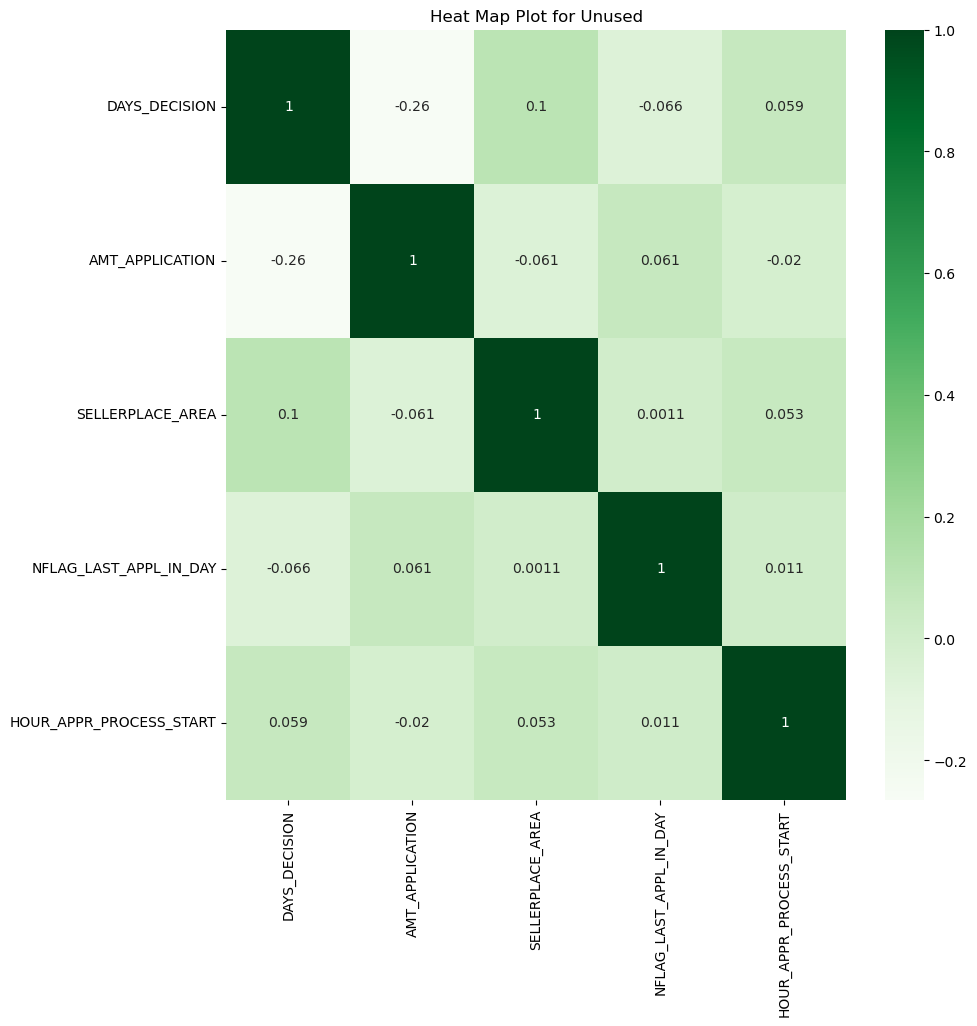

In [125]:
# Co-relation for Numerical Columns for unused
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused.corr(),annot=True,cmap="Greens")
plt.title("Heat Map Plot for Unused")
plt.show()

In [126]:
# Merge the Application and Previous Application Dataframes
merge_df = app_df.merge(papp_df, on=["SK_ID_CURR"], how='left')
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,AMT_CREDIT_CATEGORY,AGE_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,1,9,5,medium credit,below 25,1038818.0,Consumer loans,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,3,0,NaN,25-45,1810518.0,Cash loans,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,3,0,NaN,25-45,2636178.0,Consumer loans,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,3,0,NaN,25-45,2396755.0,Consumer loans,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,11,6,Very low credit,45-65,1564014.0,Consumer loans,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,middle


In [ ]:
merge_df.info()

In [ ]:
# Filtering required columns for our Analysis
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col,axis=1,inplace=True)

In [ ]:
merge_df.shape

In [ ]:
res1 = pd.pivot_table(data=merge_df,index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"],
                      columns=["NAME_CONTRACT_STATUS"],values="TARGET",aggfunc='mean')
res1

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(res1, annot=True, cmap='BuPu')
plt.show()

In [ ]:
# Conclusion : 
# 1 Applicants with income type Maternity leave and client type they are having more chances of getting the loan approved
# 2 Applicants with income type Maternity leave, Unemployed and client type repeater are having getting the loan cancelled
# 3 Applicants with income type Maternity leave, unemployed and client type repeater are having getting the loan refused
# 4 Applicants with income type Maternity leave and client type repeater, working and client type now are able to utilize the loan amount


In [ ]:
res2 = pd.pivot_table(data=merge_df, index=["CODE_GENDER","NAME_SELLER_INDUSTRY"], columns="TARGET",
                     values="HOUR_APPR_PROCESS_START_x", aggfunc='sum')

In [ ]:
res2

In [ ]:
plt.figure(figsize=[12,12])
sns.heatmap(res2, annot=True, cmap='GnBu')
plt.show()

In [ ]:
# Conclusion :
# 1 Other selling industry of females are less likely to repay the loan
# 2 Electronic industry of males are more likely to repay the loan

In [ ]:
### HERE IS OUR CREDIT EDA PROJECT IS COMPLETED ###
# IN SHORTS STEPS WE HAVE DONE ARE :
# STEP 1 - IMPORTING AND CLEANING DATA OF OUR APPLICATION DATASET
# STEP 2 - UNIVARIATE ANALYSIS 
# STEP 3 - BIVARIATE ANALYSIS AND MULTIVARIATE ANALYSIS
# STEP 4 - PREVIOUS APPLICATION ANALYSIS 
# STEP 5 - MERGING THE PREVIOUS APPLICATION DATASET TO APPLICATION DATASET
# STEP 6 - WE GOT THE RESULT AND COMMENT DOWN A CONCLUSION OF EVERY STEP PROCEDURE 